# BrainStation Capstone Project
### Project: Prediction of Purchase Time and Quantity by Customer and Product
### Author: Cristhian Lima
### Year: 2024

# Table of Contents
1. [Project Overview](#project-overview)
    - [Introduction](#introduction)
    - [Business Case](#business-case)
    - [Business Problem](#business-problem)
    - [Objectives](#objectives)
    - [Expected Outcome](#expected-outcome)
2. [Dataset](#dataset)
    - [Dataset Gathering](#dataset-gathering)
    - [Data Dictionary](#data-dictionary)
3. [Exploration and Preprocessing](#exploration-and-preprocessing)
    - [Data Cleaning](#data-cleaning)
    - [Exploratory Data Analysis (EDA)](#data-analysis)
    - [Sales Over Time Analysis](#sales-analysis)
    - [Customer Analysis](#customer-analysis)
    - [Product Analysis](#product-analysis)
    - [Correlation Analysis](#correlation-analysis)
4. [Model Approach](#model-dev)
    - [Estimated Purchase Time Calculation per Customer](#avg-projected)
    - [Simple Average Method](#savg-method)
    - [Analysis of Sales Frequency of Products by Customer](#freq-method)
    - [Average sales time and quantity per customer](#[average-sales-time-and-quantity)
    - [Linear Regression for Estimated Purchasing Time](#lr-projected)
[SPRING 3](#spring-3)
5. [Model Improvement](#model-imp)
    - [Improving Linear Regression](#lr-imp)
        - [Removing Outliers](#lr-out)
        - [Linear Regression Improved](#lr-improved)
        - [Time Features](#lr-timefeature)
        - [Final Linear Regression](#lr-final)
        - [Predicted Dates Using Linear Regression](#lr-predicting)
        - [Consolidated Evaluation of Prediction Using Linear Regression](#lr-evaluation)
        - [Linear Regression Conclusion](#lr-finalconc)
    - [Time Series for Estimated Purchase Quantities](#ts-projected)
        - [Defining Dataframe for Time Series](#ts-data)
        - [Time Series Decomposition](#ts-decomp)
        - [Projection for the next 12 months](#ts-originalforecast)
        - [Winsorization](#winsorization)
        - [Winsorized Time Series Decomposition](#ts-decompwins)
        - [Final Projeccion Winsorized](#ts-finalforecast)
        - [Time Series Conclusion](#ts-finalconcl)
    - [Applying Average Method and Linear Regression for Predicted Dates and comparing with Real Values](#comp-methods)
    - [Comparing Time Series with real Values for 2024](#ts-compar)
6. [Project Final Conclusion](#final-concl)

# **SPRING 1**

# 1. Project Overview <a class="anchor" id="project-overview"></a>

## Introduction <a class="anchor" id="introduction"></a>
Efficient inventory management is a challenge for many businesses, as maintaining the right stock levels is critical to balance supply and demand. Overstocking can lead to increased holding costs and wasted resources, while stockouts can result in lost sales, poor customer satisfaction, and potential damage to the company’s reputation.

This project aims to answer the following two questions:

 1. **What is the average purchase time for each customer?** With this information, we can estimate when the customer will make their next purchase.
 2. **What is the average purchase quantity of the items?** This information allows us to anticipate the inventory quantities needed to cover future customer orders.

## Business Case <a class="anchor" id="business-case"></a>
For security reasons, the company's name is omitted.

The company is located in the USA and specializes in the manufacturing and printing of foodservice products.

Its main lines of business include: napkins, cups, bags, and TechnoLiners.

This company has requested to calculate when is the next customer purchasing (in term of days) and the quantity products to be purchased.


## Business Problem <a class="anchor" id="business-problem"></a>
The lack of accurate demand forecasting can lead to misinformed purchasing and replenishment decisions, creating inefficiencies in the supply chain.

## Objectives <a class="anchor" id="objectives"></a>
1. **Data Exploration and Preprocessing:** Clean and prepare the dataset, ensuring that it is suitable for predictive analysis by addressing missing data, inconsistencies, and outliers.

2. **Sales Pattern Analysis:** Perform Exploratory Data Analysis (EDA) to identify patterns, in sales, which will help in understanding demand behavior.

3. **Model Development:** Use machine learning and time-series forecasting techniques to predict future demand and establish optimal stock levels for the business.

4. **Evaluation and Optimization:** Evaluate the model’s performance using appropriate metrics, refine the model to improve accuracy, and provide actionable insights for stock management.

## Expected Outcome: <a class="anchor" id="expected-outcome"></a>
By the end of the project, we expect to answer the two main questions:
 1. **What is the average purchase time for each customer?**
 2. **What is the average purchase quantity of the items?**

By creating a predictive tool that will enable the business to optimize its inventory levels, reduce costs, and improve overall supply chain efficiency.

The insights gained from this model will support data-driven decision-making and enhance the company’s ability to meet customer demands with more precision.

# 2. Dataset <a class="anchor" id="dataset"></a>

## Dataset Gathering <a class="anchor" id="dataset-gathering"></a>

The dataset consists of information gathered from customer's ERP SAP Business One ERP.

Below is a query and table that describes the fields used in the invoice query, providing detailed information about each column, its purpose, and the table it originates from.

```
SELECT
    T0."DocEntry",  -- Internal Id Invoice
    T0."DocNum",    -- Invoice Number
    T0."CardCode",  -- Customer Code
    T0."CardName",  -- Customer Name
    T2."GroupCode", -- Customer Group Code
    T4."GroupName", -- Customer Group Name
    T2."Country",  -- Customer Country Code
    T5."Name" "CountryName", -- Customer Country Name
    T2."State1",  -- Customer State Code
    T6."Name" "StateName", -- Customer State Name
    T2."City",   -- Customer City
    T0."DocDate", -- Invoice Date
    T0."SlpCode", -- Sale Employee Code
    T0."DocCur", -- Invoice currency
    T0."DocRate", -- Invoice currency rate
    T0."DocTotal", -- Invoice Total in Main Currency USD
    T0."DocTotalFC", -- Invoice Total in Foreign Currency
    T1."ItemCode", -- Item Code
    T3."ItmsGrpCod", -- Item Group Code
    T7."ItmsGrpNam", -- Item Group Name
    T3."ItemName", -- Item Description
    T1."Quantity", -- Quantity sold
    T1."WhsCode", -- Warehouse code
    T1."StockPrice", -- Cost of item in Invoice
    T1."PriceBefDi", -- Price before discount Invoiced
    T1."DiscPrcnt",  -- Discount per item in Invoice
    T1."Price",  -- Price after discount Invoiced
    T1."LineTotal" -- Total per Line in Main Currency USD (quatity per price after discount)

FROM "OINV" T0
INNER JOIN "INV1" T1 ON T0."DocEntry" = T1."DocEntry"
INNER JOIN "OCRD" T2 ON T0."CardCode" = T2."CardCode"
INNER JOIN "OITM" T3 ON T1."ItemCode" = T3."ItemCode"
INNER JOIN "OCRG" T4 ON T2."GroupCode" = T4."GroupCode"
INNER JOIN "OCRY" T5 ON T2."Country" = T5."Code"
LEFT JOIN "OCST" T6 ON T2."State1" = T6."Code"
INNER JOIN "OITB" T7 ON T3."ItmsGrpCod" = T7."ItmsGrpCod"

WHERE
    T0."DocType" = 'I' -- Only Item Invoices
	AND T0."CANCELED"='N' -- Documents are not canceled
    AND T3."InvntItem"='Y' -- Only inventory items
ORDER BY T0."DocNum"

```

## Data Dictionary <a class="anchor" id="data-dictionary"></a>

| Column            | Description                                                                                         | Table   |
|-------------------|-----------------------------------------------------------------------------------------------------|---------|
| `T0."DocEntry"`   | Unique identifier for the invoice. This is the internal ID used in the system to reference the invoice. | OINV    |
| `T0."DocNum"`     | Invoice number assigned to the document. This is the number typically used for referencing invoices in reports and communications. | OINV    |
| `T0."CardCode"`   | Code that identifies the customer in the system. This is a unique identifier for each customer.       | OINV    |
| `T0."CardName"`   | Name of the customer as registered in the system. It corresponds to the company's or individual’s official name. | OINV    |
| `T2."GroupCode"`  | Code representing the customer group, used to categorize customers into different segments (e.g., retail, wholesale, etc.). | OCRD    |
| `T4."GroupName"`  | Descriptive name of the customer group, providing a more user-friendly label for the group code.     | OCRG    |
| `T2."Country"`    | Code representing the country of the customer, often using ISO standards for country codes.          | OCRD    |
| `T5."Name"`       | Full name of the country corresponding to the country code, giving a human-readable version of the customer's location. | OCRY    |
| `T2."State1"`     | Code representing the state or province of the customer, used in regions where such administrative divisions exist. | OCRD    |
| `T6."Name"`       | Full name of the state or province, corresponding to the state code. Provides a human-readable location identifier. | OCST    |
| `T2."City"`       | City where the customer is located, providing more granular geographic detail of the customer's address. | OCRD    |
| `T0."DocDate"`    | Date the invoice was created or issued. This is the official date of the transaction for accounting and auditing purposes. | OINV    |
| `T0."SlpCode"`    | Code that identifies the sales employee responsible for the invoice. This is used for tracking sales by representative. | OINV    |
| `T0."DocCur"`     | Currency in which the invoice was issued (e.g., USD, EUR), specifying the monetary unit for the transaction. | OINV    |
| `T0."DocRate"`    | Exchange rate applied if the invoice currency differs from the company’s main currency, showing the conversion factor. | OINV    |
| `T0."DocTotal"`   | Total amount of the invoice in the company's main currency (USD), including all charges and taxes. | OINV    |
| `T0."DocTotalFC"` | Total amount of the invoice in the foreign currency (if applicable), providing the total cost in the currency used for the transaction. | OINV    |
| `T1."ItemCode"`   | Code that uniquely identifies the item being sold, as registered in the inventory system.            | INV1    |
| `T3."ItmsGrpCod"` | Code representing the item group, categorizing items into different segments (e.g., electronics, clothing, etc.). | OITM    |
| `T7."ItmsGrpNam"` | Descriptive name of the item group, providing a human-readable label for the item group code.        | OITB    |
| `T1."ItemName"` | Description of the item, typically containing the item’s full name and additional details. | OITM    |
| `T1."Quantity"`   | Number of units sold of the item. Represents the quantity of the product included in the invoice.     | INV1    |
| `T1."WhsCode"`    | Code representing the warehouse from which the item is being shipped or managed. Helps track inventory across multiple locations. | INV1    |
| `T1."StockPrice"` | Cost of the item at the time of the invoice, based on stock valuation methods (e.g., FIFO, LIFO), used for cost analysis. | INV1    |
| `T1."PriceBefDi"` | Price of the item before any discounts are applied. This is the base price charged for the product.   | INV1    |
| `T1."DiscPrcnt"`  | Percentage discount applied to the item on the invoice. Represents the discount provided to the customer for that specific item. | INV1    |
| `T1."Price"`      | Final price of the item after the discount is applied. This is the amount that will be invoiced to the customer. | INV1    |
| `T1."LineTotal"`  | Total amount for the line item in the invoice, calculated as `Quantity * Price`, representing the total charge for that product in the invoice currency. | INV1    |

# 3. Exploration and Preprocessing <a class="anchor" id="exploration-and-preprocessing"></a>

## Data Cleaning <a class="anchor" id="data-cleaning"></a>

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
# Loading the dataset
df = pd.read_csv('SalesSapFl.csv', delimiter=';')
df.head()

,DocEntry,DocNum,CardCode,CardName,GroupCode,GroupName,Country,CountryName,State1,StateName,...,ItmsGrpCod,ItmsGrpNam,ItemName,Quantity,WhsCode,StockPrice,PriceBefDi,DiscPrcnt,Price,LineTotal
0,460,"13,953",C00311,360 Proaction,100,Customers,US,USA,FL,Florida,...,114,Rush Fees,Rush/Expedite Fee,1,FP,50,50,0,50,50
1,460,"13,953",C00311,360 Proaction,100,Customers,US,USA,FL,Florida,...,104,Napkins,"Beverage Napkin, 2 PLY, 10 X 10 White, 1/4 Fol...",1,FP,127.78,108,0,108,108
2,462,"13,955",C00256,Rodman Think Branding LLC,100,Customers,US,USA,FL,Florida,...,104,Napkins,"Beverage Napkin: 10x10, 1-Ply, 1/4 Fold. Kraft...",5,FP,70,42.13,0,42.13,210.65
3,463,"13,956",C00239,"Promos4Sale.com, LLC",100,Customers,US,USA,FL,Florida,...,104,Napkins,"Beverage Napkin: 2-Ply 10x10, 1/4 Fold. Black ...",10,FP,63.077,55.26,0,55.26,552.6
4,468,"13,960",C00216,Packaging Direct,100,Customers,US,USA,FL,Florida,...,104,Napkins,"Beverage Napkin, 2 PLY, 10 X 10 White, 1/4 Fol...",6,FP,49.63,29.21,0,29.21,175.26


In [3]:
df.shape

(16724, 28)

Our original dataframe has a total of 16724 rows and 28 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16724 entries, 0 to 16723
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DocEntry     16724 non-null  object
 1   DocNum       16724 non-null  object
 2   CardCode     16724 non-null  object
 3   CardName     16724 non-null  object
 4   GroupCode    16724 non-null  int64 
 5   GroupName    16724 non-null  object
 6   Country      16724 non-null  object
 7   CountryName  16724 non-null  object
 8   State1       16724 non-null  object
 9   StateName    16724 non-null  object
 10  City         16724 non-null  object
 11  DocDate      16724 non-null  object
 12  SlpCode      16724 non-null  int64 
 13  DocCur       16724 non-null  object
 14  DocRate      16724 non-null  int64 
 15  DocTotal     16724 non-null  object
 16  DocTotalFC   16724 non-null  int64 
 17  ItemCode     16724 non-null  object
 18  ItmsGrpCod   16724 non-null  int64 
 19  ItmsGrpNam   16724 non-nu

As you can see, the columns do not show data in null, however, after reviewing some columns, we found that the '?' symbol exists, wich represent a Null Value.

Below we will identify in which columns we have this symbol in order to replace it:

In [136]:
# Check if the '?' symbol is present in some cell of the DataFrame
contains_simbol = df.applymap(lambda x: '?' in str(x))

# Show columns that contain '?'
columns_simbol = contains_simbol.any()

# Show columns that contain '?'
print(columns_simbol[columns_simbol == True].index.tolist())

C:\Users\Cris\AppData\Local\Temp\ipykernel_6804\854124791.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contains_simbol = df.applymap(lambda x: '?' in str(x))


['State1', 'StateName', 'City', 'DiscPrcnt']


Now we will create a function that will take 2 parameters, first parameter a list of columns that are string and second parameter, and second parameter takes the columns of type int and converts them to zero.

In [137]:
# Function to remove '?' from a list of columns

def removing_sign(df, columns_string=None, columns_int=None):
    if columns_string:
        for col in columns_string:
            df[col] = df[col].replace('?', '')

    if columns_int:
        for col in columns_int:
            df[col] = df[col].replace('?', 0)

    return df

In [138]:
# Setting the list of columns with '?' to be used in the function:
columns_string=['State1','StateName','City']
columns_int=['DiscPrcnt']

In [139]:
# Applying the function to columns with '?' simbol
df = removing_sign(df, columns_string = columns_string, columns_int = columns_int)

Checking again for '?' sign in the columns

In [140]:
# Check if the '?' symbol is present in some cell of the DataFrame
contains_simbol = df.applymap(lambda x: '?' in str(x))

# Show columns that contain '?'
columns_simbol = contains_simbol.any()

# Show columns that contain '?'
print(columns_simbol[columns_simbol == True].index.tolist())

C:\Users\Cris\AppData\Local\Temp\ipykernel_6804\854124791.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contains_simbol = df.applymap(lambda x: '?' in str(x))


[]


Now we have our df without '?' simbol.

Now, after exploring the type of the columns, is required to modify the datatype, transforming from object to int, float, or date, and optionally strips whitespace from column names.

For doing that, the next function cleans the columns indicated, considering the following parameters.

Parameters:
* df (pd.DataFrame): The DataFrame containing the data.
* columns_to_int (list): List of column names to be converted to int.
* columns_to_float (list): List of column names to be converted to float.
* columns_to_date (list): List of column names to be converted to datetime.
* clean_column_names (bool): Whether to strip leading/trailing whitespace from column names, by default True.

Additionally, from the outset we already know that the DocEntry and DocNum columns are the document number, both the internal id and the invoice number.

Despite being numeric, these columns will not be used to perform operations, so we will convert them into strings, and avoid any confusion when using them in any model.

Finally, the funtion returns as result, a DataFrame with the specified columns converted and column names cleaned.

In [141]:
# Function to tranform columns from object to int float, datetype, and remove spaces if exist

def columns_to_convert(df, columns_to_int=None, columns_to_float=None, columns_to_date=None, clean_column_names=True):

    # Clean column names by stripping whitespace
    if clean_column_names:
        df.columns = df.columns.str.strip()

    # Convert columns that are just internal id's like 'DocEntry', 'DocNum' to string and remove commas
    for col in ['DocEntry', 'DocNum', 'GroupCode', 'SlpCode', 'ItmsGrpCod']:
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace(',', '')

    # Convert columns to int
    if columns_to_int:
        for col in columns_to_int:
            if df[col].dtype == 'object':
                df[col] = df[col].str.replace(',', '').astype(int)

    # Convert columns to float
    if columns_to_float:
        for col in columns_to_float:
            if df[col].dtype == 'object':
                df[col] = df[col].str.replace(',', '').astype(float)

    # Convert columns to date
    if columns_to_date:
        for col in columns_to_date:
            df[col] = pd.to_datetime(df[col])

    return df

In [142]:
# Setting the list of columns with to be used in the function with the aim of being transformer from Object to int, float or date:
columns_to_float=['DocTotal', 'DocTotalFC', 'LineTotal', 'StockPrice', 'PriceBefDi', 'Price', 'Quantity']
columns_to_date=['DocDate']

In [143]:
# Applying the function to all the columns to be transformed
df = columns_to_convert(df, columns_to_float = columns_to_float, columns_to_date = columns_to_date)

C:\Users\Cris\AppData\Local\Temp\ipykernel_6804\547315848.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


We proceed to review the data type of each column again, where we can verify that they have already changed from Object to int64, datetime64 and float64.

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16724 entries, 0 to 16723
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DocEntry     16724 non-null  object        
 1   DocNum       16724 non-null  object        
 2   CardCode     16724 non-null  object        
 3   CardName     16724 non-null  object        
 4   GroupCode    16724 non-null  object        
 5   GroupName    16724 non-null  object        
 6   Country      16724 non-null  object        
 7   CountryName  16724 non-null  object        
 8   State1       16724 non-null  object        
 9   StateName    16724 non-null  object        
 10  City         16724 non-null  object        
 11  DocDate      16724 non-null  datetime64[ns]
 12  SlpCode      16724 non-null  object        
 13  DocCur       16724 non-null  object        
 14  DocRate      16724 non-null  int64         
 15  DocTotal     16724 non-null  float64       
 16  DocT

In [14]:
# statistical description of the data
df.describe()

,DocDate,DocRate,DocTotal,DocTotalFC,Quantity,StockPrice,PriceBefDi,Price,LineTotal
count,16724,16724.0,16724.000000,16724.0,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000
mean,2022-03-21 20:04:40.698397440,1.0,2599.214500,0.0,27.463406,52.287262,90.381184,90.353261,1759.158359
min,2018-08-31 00:00:00,1.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-08-25 18:00:00,1.0,752.600000,0.0,5.000000,26.773750,50.904250,50.815000,519.600000
50%,2022-06-30 00:00:00,1.0,1323.365000,0.0,10.000000,48.064500,78.373000,78.370000,914.680000
75%,2023-11-30 00:00:00,1.0,2625.000000,0.0,25.000000,66.626750,116.338000,116.312250,1740.250000
max,2024-10-18 00:00:00,1.0,318220.000000,0.0,6364.000000,1789.100000,1926.600000,1926.600000,318220.000000
std,NaN,0.0,5842.992402,0.0,99.866909,35.915454,58.039073,58.042585,4527.354544


This statistical analysis describes a dataset of 16,724 sales records. The transaction dates range from August 31, 2018, to October 18, 2024.

The average sales values indicate that the average number of items sold per transaction is 27.46 units. Sales fluctuate widely, with quantities ranging from one unit sold to 6,364.

The analysis also reveals significant variation in prices. The average price before discount is 90.38, but it can reach up to 1,926.60, reflecting the diversity of items in the transactions. The median of the total price of the lines (LineTotal) is 914.68, indicating that 50% of the transactions are below this value, while 25% of the transactions have a value below 519.60.



# 4. Exploratory Data Analysis (EDA) <a class="anchor" id="data-analysis"></a>

**IMPORTANT NOTE:** In our analysis, it is important to consider that there are two columns for totals: "LineTotal" and "DocTotal".

* "LineTotal" represents the total per line in the document (Price * Quantity).
* "DocTotal" corresponds to the total amount of the document, including taxes and other non-inventory services such as freight, fees, etc. The total invoiced is duplicated by the number of rows in each invoice.

To analyze the total invoiced by customer, we will consider the "DocTotal" column, whereas for evaluating sales by inventory based on monetary value, we will use the "LineTotal" column.

Next, an exploratory analysis will be conducted to understand the trends and patterns in the data:

Sales Analysis:

* Analyze how sales are distributed over time.
* Customer Analysis: Total sold per customers over time.
* Product Analysis: Most sold products and trends.
* Correlations: Analyze the correlations with sales to identify which factors influence demand.

## General Sales Over Time Analysis per Year <a class="anchor" id="sales-analysis"></a>

In [15]:
# Creating a new dataframe, grouping by 'DocNum' and keep a single value for DocTotal
df_unique_doctotal = df.groupby(['DocNum', 'CardCode','CardName','DocDate'], as_index=False)['DocTotal'].first()
df_unique_doctotal.head()

,DocNum,CardCode,CardName,DocDate,DocTotal
0,13953,C00311,360 Proaction,2018-08-31,358.00
1,13955,C00256,Rodman Think Branding LLC,2018-08-31,210.65
2,13956,C00239,"Promos4Sale.com, LLC",2018-08-31,707.60
3,13960,C00216,Packaging Direct,2018-08-31,175.26
4,13961,C00152,Hospitality Purchasing LLC,2018-08-31,4431.60


In [16]:
# Table showing the  total sales per year
sales_per_year = df.groupby([df_unique_doctotal['DocDate'].dt.to_period('Y')])['DocTotal'].sum().reset_index()
sales_per_year['DocDate'] = sales_per_year['DocDate'].dt.to_timestamp()
sales_per_year.head(10)

,DocDate,DocTotal
0,2018-01-01,1017369.38
1,2019-01-01,3560004.77
2,2020-01-01,2260954.59
3,2021-01-01,4292876.89
4,2022-01-01,5372206.63
5,2023-01-01,10082851.62
6,2024-01-01,8985666.41


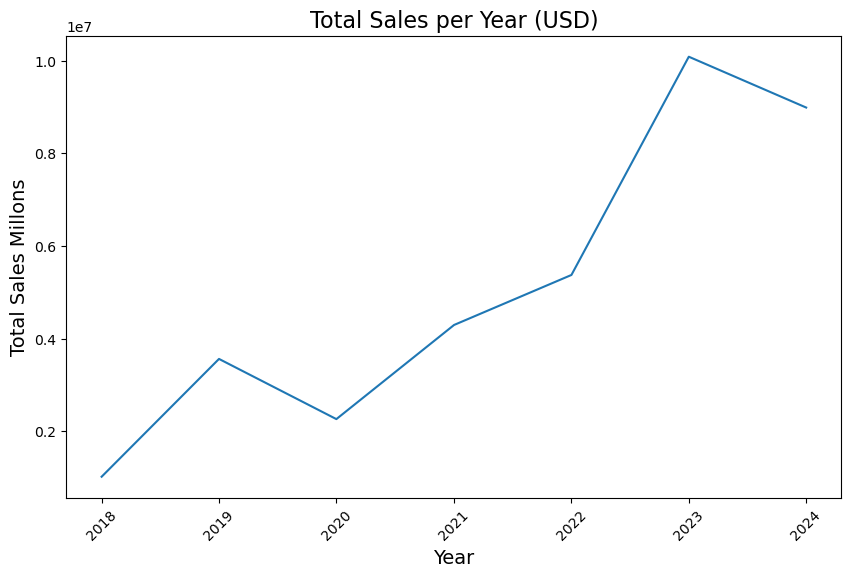

In [17]:
# Total Sales per Year Graph
plt.figure(figsize=(10, 6))
plt.plot(sales_per_year['DocDate'], sales_per_year['DocTotal'])
plt.title('Total Sales per Year (USD)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales Millons', fontsize=14)
plt.xticks(rotation=45)
plt.show()

This chart shows the evolution of sales over the years. It can be observed that from 2018 to 2024, sales are increasing progressively.

In 2023 the tend reaches its peak in billing.
2024 is still in progress and with almost 3 months remaining until the end of the year, the invoiced value is very close to reaching its maximum level in 2023.

In [130]:
total_sales = round(sales_per_year['DocTotal'].sum(), 2)
print(f"The total sales over the last 6 years is: {total_sales}")

The total sales over the last 6 years is: 35571930.29


## Customer Analysis <a class="anchor" id="customer-analysis"></a>

The objective of this analysis is to identify the main customers, track their purchasing trends over time, and select the Top 5 customers that will be used for predictions in our model

### Total sales per customer

In [18]:
# Total Sales per customer
sales = df_unique_doctotal.groupby(['CardCode','CardName'])['DocTotal'].sum().reset_index()
salescust = sales.sort_values(by='DocTotal', ascending=False).head(5)
salescust

,CardCode,CardName,DocTotal
351,C00706,"Clark Associates, Inc.",2126590.49
170,C00335,US Foods,1511294.92
60,C00129,General Hotel & Restaurant Supply Corp,1380795.36
38,C00086,Dade Paper,1344885.63
222,C00421,Bunzl R3 Philadelphia,1291921.58


The previous table shows the top 5 clients with the highest sales during the 6 years.

The following graph shows the total sales per customer.

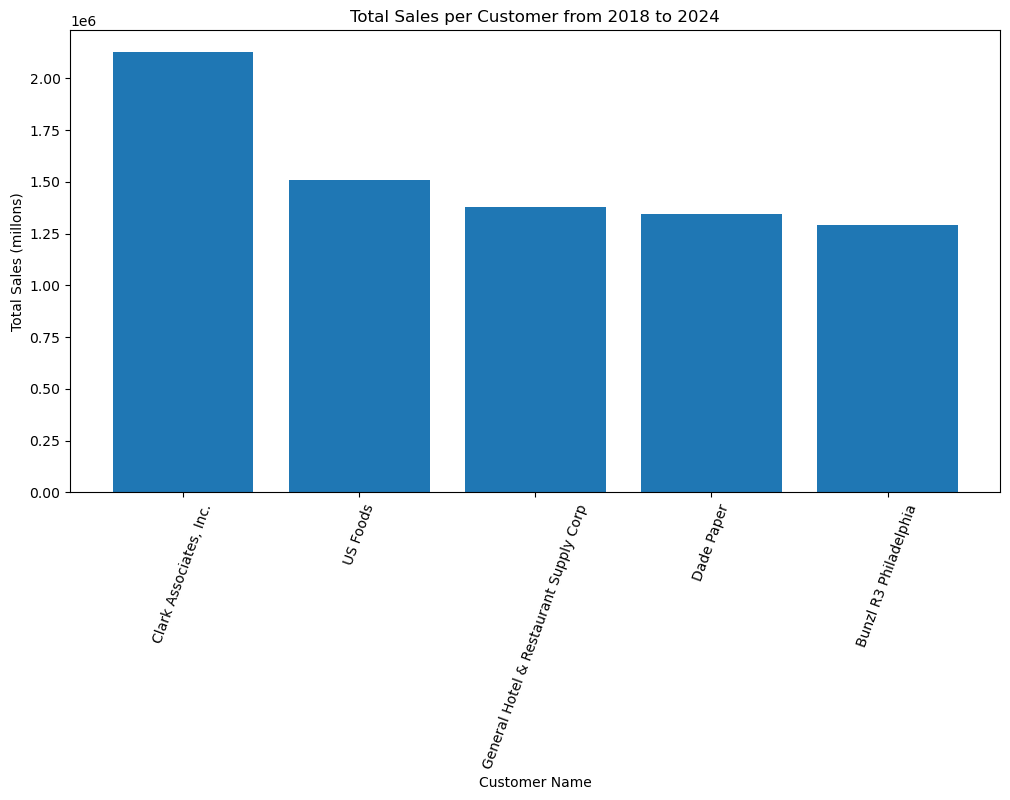

In [19]:
# Bar Chart - Total sales per customer
plt.figure(figsize=(12, 6))
plt.bar(salescust['CardName'], salescust['DocTotal'])
plt.xlabel('Customer Name')
plt.ylabel('Total Sales (millons)')
plt.title('Total Sales per Customer from 2018 to 2024')
plt.xticks(rotation=70)
plt.show()

### Sales Evolution by Time per Customer

In [20]:
# Filtering 'df_unique_doctotal' by clients who are on salescust
# New DF called 'df_top5_customers'
df_top5_customers = df_unique_doctotal[df_unique_doctotal['CardCode'].isin(salescust['CardCode'])]
df_top5_customers['CardCode'].unique()

array(['C00086', 'C00129', 'C00335', 'C00421', 'C00706'], dtype=object)

In [21]:
# Sales evolution by time per customer
# Creating sales dataframe by year and customer
sales_customer_time = df_top5_customers.groupby([df_top5_customers['DocDate'].dt.to_period('Y'), 'CardName'])['DocTotal'].sum().reset_index()
sales_customer_time.head()

,DocDate,CardName,DocTotal
0,2018,Dade Paper,66119.83
1,2018,General Hotel & Restaurant Supply Corp,72724.26
2,2018,US Foods,1177.32
3,2019,Bunzl R3 Philadelphia,150416.89
4,2019,Dade Paper,214566.35


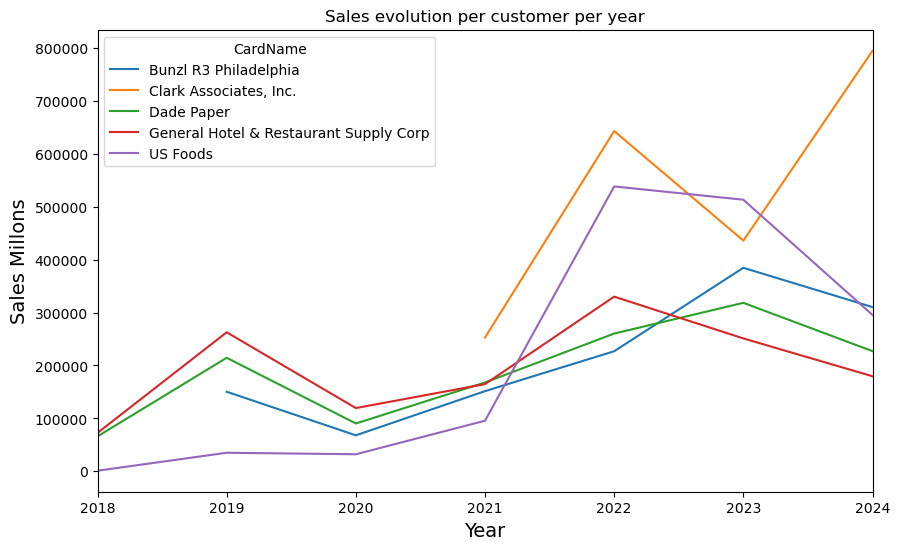

In [22]:
# Modifying dataframe form clients as columns and dates as rows
sales_customer_time = df_top5_customers.groupby([df_top5_customers['DocDate'].dt.to_period('Y'), 'CardName'])['DocTotal'].sum().unstack()

# Graph of the evolution of sales by clients and per year
sales_customer_time.plot(figsize=(10, 6), title='Sales evolution per customer per year')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales Millons', fontsize=14)
plt.show()

In [23]:
sales_customer_time

CardName,Bunzl R3 Philadelphia,"Clark Associates, Inc.",Dade Paper,General Hotel & Restaurant Supply Corp,US Foods
DocDate,,,,,
2018,NaN,NaN,66119.83,72724.26,1177.32
2019,150416.89,NaN,214566.35,262761.25,35126.91
2020,68036.04,NaN,90449.53,119552.87,32273.10
2021,151560.60,252926.67,167894.08,164826.05,95669.58
2022,226958.60,642942.40,260337.15,330118.67,538298.69
2023,384611.58,435950.13,318424.72,251129.98,513242.65
2024,310337.87,794771.29,227093.97,179682.28,295506.67


We can see that 'Clark Associates, Inc.' in 2022 and so far in 2024, is the top-performing customer, being a relatively new client with three years of tenure.

Next is the customer 'US Foods,' which has shown sales activity from 2018 to the present, demonstrating growth in its transactions, reaching its peak in 2022, maintaining it in 2023, and showing a sharp decline so far in 2024.

The next three customers exhibit very similar trends in their purchasing amounts over time.

## Product Analysis <a class="anchor" id="product-analysis"></a>

Next, an analysis of product sales from various aspects:

* Total sales by product: Identify the products that generate the highest total sales.
* Sales frequency by product: Determine how many times each product has been sold (number of times it appears on invoices).
* Sales by product group: Analyze sales grouped by product category.
* Temporal trends by product: Examine the evolution of product sales over time.

### Top-selling products by total sales amount

In [24]:
# Top 10 sold products by amount
sales_product = df.groupby(['ItemCode', 'ItemName'])['LineTotal'].sum().reset_index()
sales_product = sales_product.sort_values(by='LineTotal', ascending=False)
top10_item_sales = sales_product.head(5)
top10_item_sales

,ItemCode,ItemName,LineTotal
127,215X178WHBDC23.0M,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",1393775.89
344,CPKACP161.0M-1,"CUP, CLEAR PLASTIC, 16 OZ, CASE PACK 1.0M CUP,...",1173199.79
87,210X104WHBDC13.0M,"Beverage Napkin, 2 PLY, 10 X 10 White, 1/4 Fol...",1157774.75
390,CPSOCP161.0M-1,"CUP, CLEAR PLASTIC, 16 OZ, CASE PACK 1.0M - CU...",960120.69
345,CPKACP161.0M-2,"CUP, CLEAR PLASTIC, 16 OZ, CASE PACK 1.0M CUP,...",664569.00


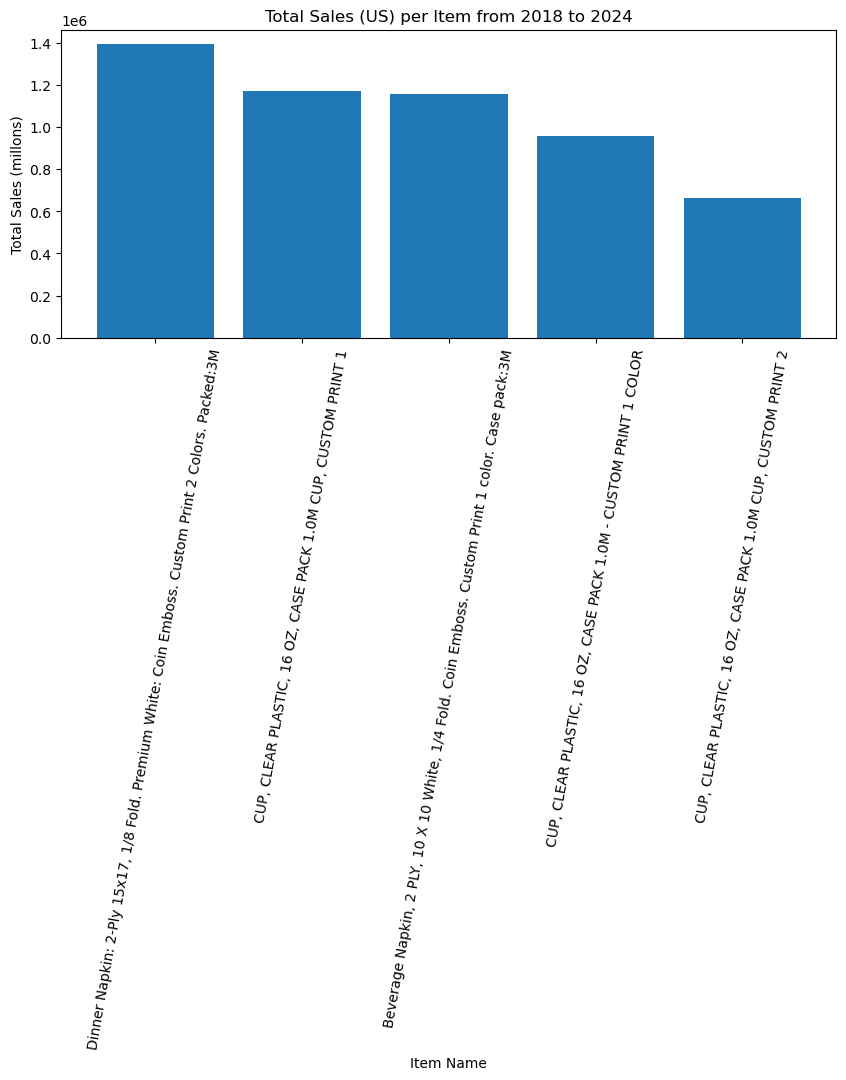

In [25]:
# Bar Chart - Total sales per item
plt.figure(figsize=(10, 4))
plt.bar(top10_item_sales['ItemName'], top10_item_sales['LineTotal'])
plt.xlabel('Item Name')
plt.ylabel('Total Sales (millons)')
plt.title('Total Sales (US) per Item from 2018 to 2024')
plt.xticks(rotation=80)
plt.show()

### Top-selling products by quantity sold

In [26]:
# Top 5 sold products by quantity
sales_productqt = df.groupby(['ItemCode', 'ItemName'])['Quantity'].sum().reset_index()
sales_productqt = sales_productqt.sort_values(by='Quantity', ascending=False)
top10_item_salesqt = sales_productqt.head(5)
top10_item_salesqt

,ItemCode,ItemName,Quantity
61,210X104BKBDCP1.0M,"Beverage Napkin: 2-Ply 10x10, 1/4 Fold. Black ...",40749.0
87,210X104WHBDC13.0M,"Beverage Napkin, 2 PLY, 10 X 10 White, 1/4 Fol...",30637.0
127,215X178WHBDC23.0M,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",18276.0
23,110X104WHBDOP4.0M,"Cocktail Napkin: 1-Ply 10x10, 1/4 Fold, Regula...",12613.0
344,CPKACP161.0M-1,"CUP, CLEAR PLASTIC, 16 OZ, CASE PACK 1.0M CUP,...",11900.0


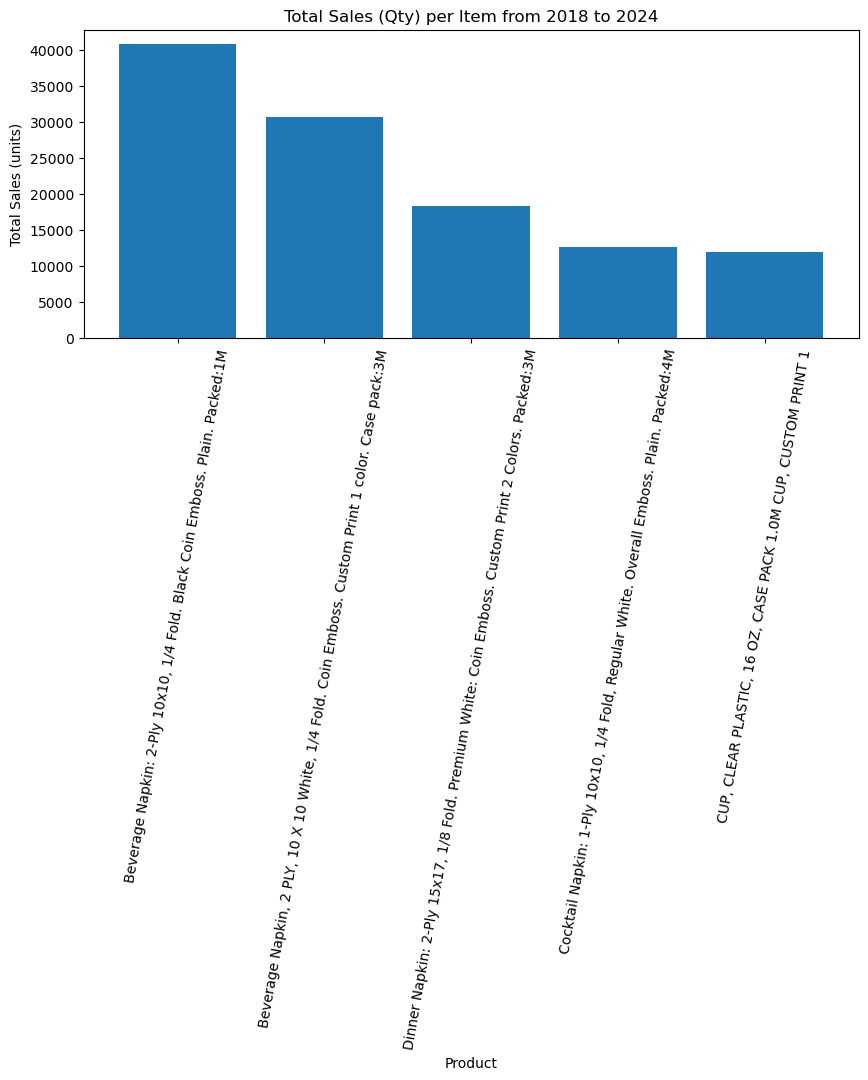

In [27]:
# Bar Chart - Top 10 sold products by quantity
plt.figure(figsize=(10, 4))
plt.bar(top10_item_salesqt['ItemName'], top10_item_salesqt['Quantity'])
plt.xlabel('Product')
plt.ylabel('Total Sales (units)')
plt.title('Total Sales (Qty) per Item from 2018 to 2024')
plt.xticks(rotation=80)
plt.show()

In the previous two charts, we can observe the total sales by revenue and by quantity.

Some of the top products appear in both charts, indicating that they not only lead in quantities sold but also have a significant impact on the company's revenue.

### Sales by product group

In [28]:
# Total sales by product group
sales_by_itemgroup = df.groupby(['ItmsGrpCod', 'ItmsGrpNam'])['LineTotal'].sum().reset_index()
sales_by_itemgroup = sales_by_itemgroup.sort_values(by='LineTotal', ascending=False)
sales_by_itemgroup.head()

,ItmsGrpCod,ItmsGrpNam,LineTotal
2,104,Napkins,13196152.64
3,105,Cups,12148147.80
4,106,Technopaper,2792448.27
1,101,Bags,1128410.81
7,113,Other Finish Product,112567.25


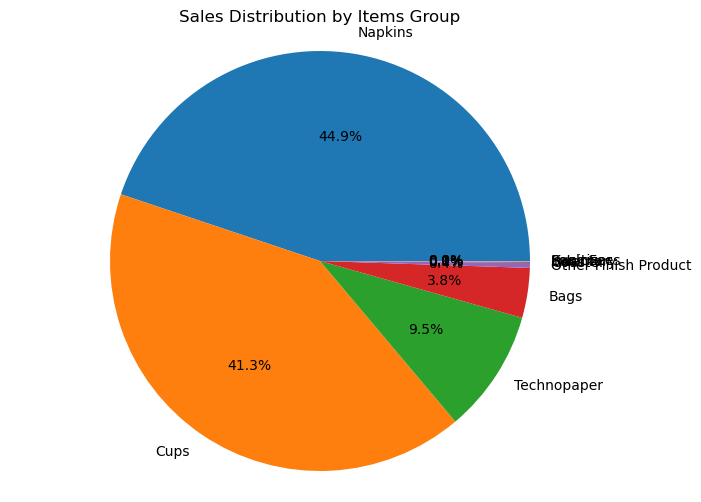

In [29]:
# Pie Chart - Percentage of sales per item group
plt.figure(figsize=(8, 6))
plt.pie(sales_by_itemgroup['LineTotal'], labels=sales_by_itemgroup['ItmsGrpNam'], autopct='%1.1f%%')
plt.title('Sales Distribution by Items Group')
plt.axis('equal')
plt.show()

In [30]:
sales_by_itemgroup['ItmsGrpNam'].unique()

array(['Napkins', 'Cups', 'Technopaper', 'Bags', 'Other Finish Product',
       'Coaster', 'Lids', 'Inventory', 'Sanitizer', 'Rush Fees'],
      dtype=object)

The highest concentration of sales is centered on products from Napkins family at 44%, Cups at 41%, and the rest is divided among the rest items family.

### Temporal trends by product and Total Amount Sold

In [31]:
# Grouping by product code and description and add up total sales
sales_per_product = df.groupby(['ItemCode', 'ItemName'])['LineTotal'].sum().reset_index()
top_5_products = sales_per_product.sort_values(by='LineTotal', ascending=False).head(5)
top_5_products

,ItemCode,ItemName,LineTotal
127,215X178WHBDC23.0M,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",1393775.89
344,CPKACP161.0M-1,"CUP, CLEAR PLASTIC, 16 OZ, CASE PACK 1.0M CUP,...",1173199.79
87,210X104WHBDC13.0M,"Beverage Napkin, 2 PLY, 10 X 10 White, 1/4 Fol...",1157774.75
390,CPSOCP161.0M-1,"CUP, CLEAR PLASTIC, 16 OZ, CASE PACK 1.0M - CU...",960120.69
345,CPKACP161.0M-2,"CUP, CLEAR PLASTIC, 16 OZ, CASE PACK 1.0M CUP,...",664569.00


In [32]:
# Filter the original DataFrame to include only the top 5 best-selling products
df_top_5_products = df[df['ItemCode'].isin(top_5_products['ItemCode'])]

In [33]:
# Grouping by date (year) and product, and add total sales
sales_top_5_time = df_top_5_products.groupby([df['DocDate'].dt.to_period('Y') ,'ItemCode'])['LineTotal'].sum().unstack()

# Show first results to verify
sales_top_5_time

ItemCode,210X104WHBDC13.0M,215X178WHBDC23.0M,CPKACP161.0M-1,CPKACP161.0M-2,CPSOCP161.0M-1
DocDate,,,,,
2018,34747.70,2178.90,NaN,NaN,35270.58
2019,158545.11,146704.06,NaN,NaN,125804.09
2020,88597.45,65296.40,NaN,NaN,91722.76
2021,116775.05,137088.71,NaN,NaN,175610.78
2022,203041.52,232254.09,102541.77,33210.72,345782.42
2023,265661.20,427722.15,530645.53,256509.54,110603.11
2024,290406.72,382531.58,540012.49,374848.74,75326.95


This graph shows the sales trend of each of the top 5 products year by year.

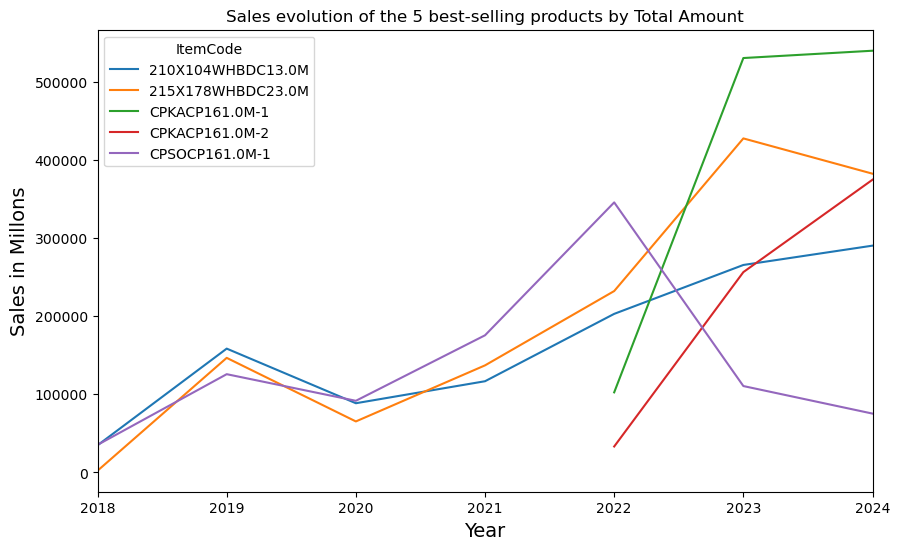

In [34]:
# Graph the evolution of sales of the 5 best-selling products by Total
sales_top_5_time.plot(figsize=(10, 6), title='Sales evolution of the 5 best-selling products by Total Amount')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales in Millons', fontsize=14)
plt.show()

The five best-selling products show an increase in sales starting from 2018, reaching their peak in 2023 for the 2 best products.

## Correlation Analysis <a class="anchor" id="correlation-analysis"></a>

We are interested in understanding which variables influence the quantity demanded.

For this analysis, the following variables are considered:

* PriceBefDi: Price before discount
* DiscPrcnt: Discount
* Price: Price after discount
* StockPrice: Item Cost
* Quantity: Quantity Invoiced

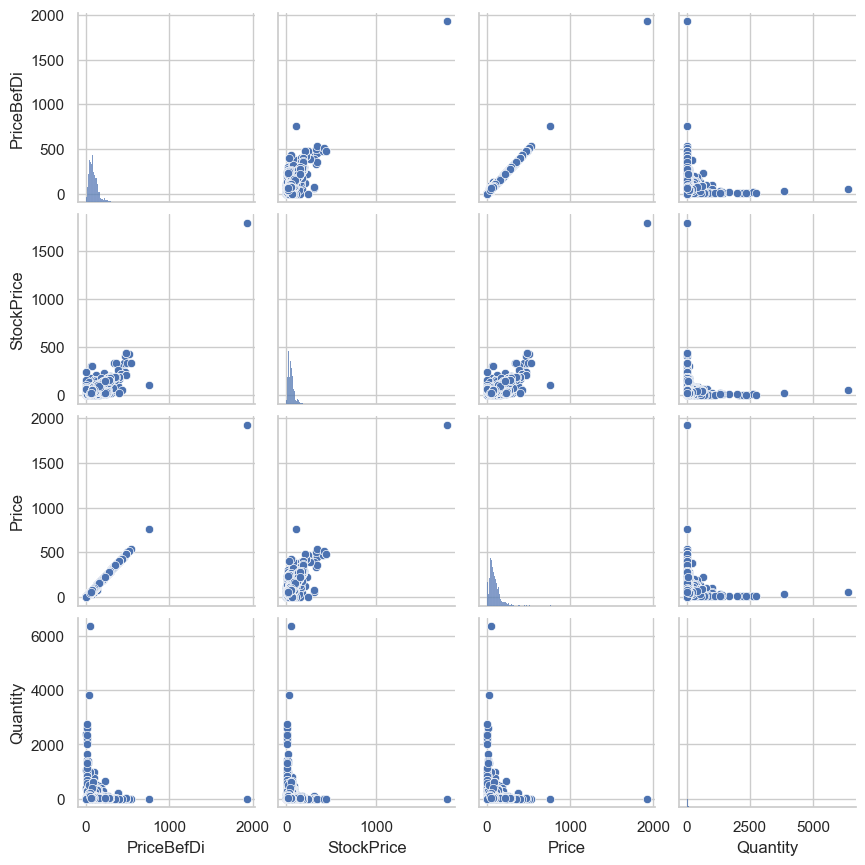

In [35]:
# Correlation Matrix Plot
sns.set(style='whitegrid', context='notebook')
cols = ['DiscPrcnt', 'PriceBefDi', 'StockPrice', 'Price', 'Quantity']
sns.pairplot(df[cols], height=2.2)

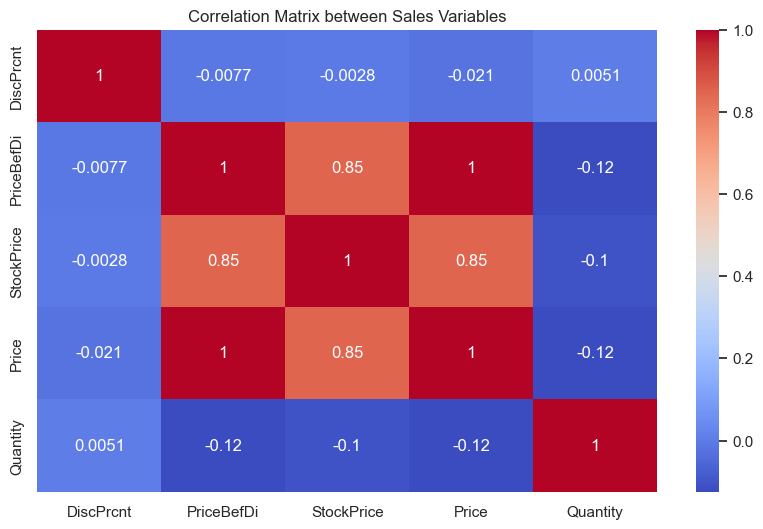

In [36]:
## Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[cols].corr(), cbar= True,  cmap='coolwarm', annot= True)
plt.title('Correlation Matrix between Sales Variables')
plt.show()

The chart shows a correlation matrix between the variables DiscPrcnt, PriceBefDi, StockPrice, Price, and Quantity.

1. **High correlation between PriceBefDi, StockPrice, and Price:**

These three variables are strongly correlated (0.98 to 1.0), indicating that as one value increases, the others do as well, almost proportionally. This makes sense, as the price before discount (PriceBefDi) and the final price (Price) are closely related, and the item cost (StockPrice) also influences the sale price.

2. **Low correlation between Quantity and other variables:**

The quantity sold (Quantity) is not strongly correlated with other variables such as Price, StockPrice, or DiscPrcnt. This might suggest that the quantities sold are not heavily dependent on prices or discounts, which could require deeper analysis.

3. **Weak relationship between DiscPrcnt and other variables:**

The discount percentage (DiscPrcnt) does not have a strong correlation with the other variables, indicating that discounts don't have a significant impact on price or the quantity sold in this particular case.

# **SPRING 2**

# 4. Modeling Approach <a class="anchor" id="model-dev"></a>

Now we will begin exploring ways to answer our two main questions:

What is the average purchase time for each customer?
What is the average purchase quantity of the items?
For this analysis, we will focus only on answering these questions for the top 5 customers by sales amount.

We will start by identifying the average purchase time. To do this, we will determine the purchase frequency of each customer and try to estimate the expected purchase interval:

We'll begin by creating a new dataframe with data exclusively from the top 5 customers:

In [37]:
# Filtering the original DataFrame to include only the top 5 best-selling customers
df_main_clients = df_top5_customers.copy(deep=True)
df_main_clients.head()

,DocNum,CardCode,CardName,DocDate,DocTotal
14,13974,C00086,Dade Paper,2018-09-10,1467.0
20,13983,C00086,Dade Paper,2018-09-12,418.5
37,14005,C00129,General Hotel & Restaurant Supply Corp,2018-09-13,2200.0
38,14006,C00129,General Hotel & Restaurant Supply Corp,2018-09-13,1050.0
39,14007,C00129,General Hotel & Restaurant Supply Corp,2018-09-13,1485.0


## Estimated Purchase Time Calculation per Customer <a class="anchor" id="avg-projected"></a>


## 1. Simple Average Method <a class="anchor" id="savg-method"></a>
We will begin by calculating a simple average of the time between each purchase made by each customer.

This will provide an initial estimate of the time interval between each customer's purchases.

We will proceed as follows:

* Sort purchases by customer and date.
* Calculate the difference between purchase dates: For each customer, calculate the difference between the date of each purchase and the previous purchase.
* Average the interval: Compute the average of those differences for each customer.

The result will be the average purchase time in days for each customer.

In [38]:
# Ordering per customer and date
df_main_clients = df_main_clients.sort_values(by=['CardName', 'DocDate'])

# Calculate the difference between purchases (in days) for each customer
df_main_clients['avg_days_between_purchase'] = df_main_clients.groupby('CardCode')['DocDate'].diff().dt.days

# Calculate the average time between purchases per customer
avg_days_per_client = df_main_clients.groupby('CardName')['avg_days_between_purchase'].mean().reset_index()

# Showing the result with the average time of purchasing per customer
avg_days_per_client.head()

,CardName,avg_days_between_purchase
0,Bunzl R3 Philadelphia,42.704545
1,"Clark Associates, Inc.",0.708383
2,Dade Paper,4.422619
3,General Hotel & Restaurant Supply Corp,4.067890
4,US Foods,5.584184


Although this method is a good starting point, there are disadvantages to this approach:


* **Variability in purchase patterns:** It assumes regular purchases, which does not reflect well for customers with irregular or seasonal buying habits.

* **Does not detect trends:** It does not capture if a customer is changing their purchase frequency or if external factors are influencing their behavior.

* **Customers with few purchases:** Customers with only two transactions may have an unrepresentative average.

**Possible improvements:**

**Median instead of average:** The median could be more robust against outliers, as it is less affected by unusually long or short intervals between purchases.

**Weighted calculation:** Weight the time between purchases based on the quantity or value of transactions, giving more importance to significant purchases.

**More advanced models:** Time series analysis techniques, such as ARIMA model, can help identify more complex patterns, trends, or seasonality in purchase data.

We will now include additional variables that may influence customer purchasing patterns, including the quantity purchased or the monetary value of the transactions.

To achieve this, we will create a new DataFrame that only includes the following columns:

* DocNum: Invoice Number
* CardCode: Customer Code
* CardName: Customer Name
* DocDate: Invoice Date
* ItemCode: Product Code
* ItemName: Product Name
* Quantity: Quantity Sold
* Price: Selling Price
* LineTotal: Total Sale Amount for each item in each document

This new DataFrame will contain information solely from the top five customers.

In [39]:
# Creating a new DataFrame filtering by the main clients and selecting the necesary columns for our model
cols_model = ['DocNum','CardCode','CardName','DocDate','ItemCode','ItemName','Quantity','Price','LineTotal']
df_custom_items = df[df['CardCode'].isin(df_top5_customers['CardCode'])][cols_model]
df_custom_items.head()

,DocNum,CardCode,CardName,DocDate,ItemCode,ItemName,Quantity,Price,LineTotal
18,13974,C00086,Dade Paper,2018-09-10,215X178IVBDC13.0M,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Ivory Co...",20.0,71.600,1432.0
26,13983,C00086,Dade Paper,2018-09-12,TPPPKR09.00x12.004,TechnoPaper. Kraft 09.00inches by 12.00inches ...,2.0,194.251,388.5
43,14005,C00129,General Hotel & Restaurant Supply Corp,2018-09-13,110X104WHBDC26.0M,"Beverage Napkin: 1-Ply 10x10, 1/4 Fold, Regula...",100.0,22.000,2200.0
44,14006,C00129,General Hotel & Restaurant Supply Corp,2018-09-13,110X104WHBDC26.0M,"Beverage Napkin: 1-Ply 10x10, 1/4 Fold, Regula...",25.0,42.000,1050.0
45,14007,C00129,General Hotel & Restaurant Supply Corp,2018-09-13,110X104WHBDC26.0M,"Beverage Napkin: 1-Ply 10x10, 1/4 Fold, Regula...",50.0,29.700,1485.0


In [40]:
# Verifying that the new df contains only the filter Top 5 clients
df_custom_items['CardCode'].unique()

array(['C00086', 'C00129', 'C00335', 'C00421', 'C00706'], dtype=object)

## Analysis of Sales Frequency of Products by Customer <a class="anchor" id="freq-method"></a>

The aim of this analysis is to count how many times each customer has purchased each product.

To achieve this, we will group the data by customer (CardCode) and product (ItemCode). This will create unique combinations of customer-product pairs, allowing us to count the quantities purchased for each product.

We will focus on retaining only the top product purchased by each of the five customers.

In [41]:
# Grouping by customer 'CardCode' and product 'ItemCode' to count how many times a customer has purchased a product
product_purchase_frequency = df_custom_items.groupby(['CardCode', 'ItemCode'])['DocNum'].count().reset_index()

# Rename the column 'DocNum' for clarity as it is now a count
product_purchase_frequency.columns = ['CardCode', 'ItemCode', 'sales_count']

# Count of Products purchased per each customer
product_purchase_frequency.head()

,CardCode,ItemCode,sales_count
0,C00086,110X104KRBDC14.0M,1
1,C00086,110X104KRBDC24.0M,3
2,C00086,110X104KRBDC26.0M,22
3,C00086,110X104WHBDC14.0M,1
4,C00086,110X104WHBDC210.M,3


In [42]:
# Sorting by customer and number of product sales in descending order
product_purchase_frequency = product_purchase_frequency.sort_values(['CardCode', 'sales_count'], ascending=[True, False])

# Selecting the most sold product by each customer
most_frequent_products = product_purchase_frequency.groupby('CardCode').first().reset_index()
most_frequent_products

,CardCode,ItemCode,sales_count
0,C00086,210X104WHBDC13.0M,141
1,C00129,110X104WHBDC16.0M,91
2,C00335,210X104WHBDC13.0M,28
3,C00421,215X178WHBDC23.0M,28
4,C00706,CPCHCP161.0M-1,374


## Calculate the average sales time and quantity purchased per item and per customer <a class="anchor" id="average-sales-time-and-quantity"></a>

To improve our estimated purchase time and quantity purchased, we will now consider the purchase time for the top 5 customers, focusing on the most purchased product by each customer.

In [43]:
# New df only with Top 5 clientes and Top 5 items per customer
df_top_clients_items = df[df['CardCode'].isin(df_top5_customers['CardCode'])]

In [44]:
# Create a DataFrame with the top 5 clients and all their items
#df_top_clients_items = df[df['CardCode'].isin(df_top_clients_items['CardCode'])]

# Sort by customer, item and date
df_top_clients_items = df_top_clients_items.sort_values(by=['CardCode', 'ItemCode', 'DocDate'])

# Calculate the difference in days between purchases of the same item by the same customer
df_top_clients_items['days_between'] = df_top_clients_items.groupby(['CardCode', 'ItemCode'])['DocDate'].diff().dt.days

# Calculate the average time between purchases per customer and item
avg_days_per_top_client_item = df_top_clients_items.groupby(['CardCode', 'ItemCode']).agg({
    'days_between': 'mean',
    'Quantity': 'mean'
}).reset_index()

# Rename columns for clarity
avg_days_per_top_client_item.columns = ['CardCode', 'ItemCode', 'avg_days_between_purchases', 'avg_quantity_purchased']

# Filter only the items that are in most_frequent_products (top products)
filtered_avg_days = avg_days_per_top_client_item[avg_days_per_top_client_item['ItemCode'].isin(most_frequent_products['ItemCode'])]

# Show the final filtered result
filtered_avg_days.head()

,CardCode,ItemCode,avg_days_between_purchases,avg_quantity_purchased
17,C00086,210X104WHBDC13.0M,15.557143,47.262411
24,C00086,215X178WHBDC23.0M,NaN,34.000000
108,C00129,110X104WHBDC16.0M,24.188889,81.329670
123,C00129,210X104WHBDC13.0M,39.860000,38.921569
176,C00335,210X104WHBDC13.0M,67.407407,21.107143


This table shows us the average quantities purchased and the average purchase time for the top 5 customers and their main products.

However, an issue is arising with the filter for the products in the 'most_frequent_products' DataFrame. As a temporary workaround, we will remove the rows with items that do not match.

In [45]:
# List of indexes to delete
index_to_drop = [24, 123, 182, 284]

# Delete the rows with the specified indexes
filtered_avg_days = filtered_avg_days.drop(index_to_drop)

Showing the final result with the time and estimated purchase quantity for each of the Top 5 customers and their items

In [46]:
# Final Table with Avg of days between purchase and quantity purchase
filtered_avg_days.head()

,CardCode,ItemCode,avg_days_between_purchases,avg_quantity_purchased
17,C00086,210X104WHBDC13.0M,15.557143,47.262411
108,C00129,110X104WHBDC16.0M,24.188889,81.329670
176,C00335,210X104WHBDC13.0M,67.407407,21.107143
287,C00421,215X178WHBDC23.0M,69.592593,530.928571
311,C00706,CPCHCP161.0M-1,1.134048,7.048128


Up to this point, we have applied a simple average calculation to estimate the time between purchases for each customer. We started by calculating the overall average time between purchases, but then refined the approach by including the product in the calculation. This allowed us to be more precise in analyzing the purchase frequency per customer for each specific product. With this method, we obtained the average number of days between purchases and the average quantity purchased by each customer for their top products.

This approach enabled us to predict when a customer might make their next purchase of a given product and better understand their buying patterns. Additionally, we conducted a more detailed analysis by filtering the data to focus only on the top 5 customers and their most purchased products, which allowed us to target the analysis on the most relevant items.

However, this method has some disadvantages:

* It does not capture variability or trends: A simple average does not reflect changes in customer buying behavior over time.
* Limited robustness with sparse data: For customers with few purchases, the frequency calculation may not be representative.
* Assumption of regularity: It assumes the customer follows a regular purchase pattern, which may not be the case, especially with seasonal products or purchases.

## 2. Linear Regression for Estimated Purchasing Time <a class="anchor" id="lr-projected"></a>

In this case, we have applied linear regression to predict the time between purchases for each customer based on characteristics such as the quantity purchased and the price of the item.

The main steps will include:

1. **Data Preparation:** Use the Quantity and Price as the independent variable (X) and 'days_between' as dependent variable (y).
2. **Model Training:** Apply linear regression to the historical data for each product.
3. **Prediction:** Use the fitted model to predict 'days_between'.

This will give us a predicted value of the days of purchase which can be compared with the Current value.


**Step 1:** Prepare the data

We are going to work with sales data between 2012 and 2016, using the years as the independent variable and the quantities sold of the products as the dependent variable.



**Step 2:** Apply Linear Regression

We are going to train the model for each product using LinearRegression from scikit-learn.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [48]:
# Filter the DataFrame to only include items in 'most_frequent_products'
df_filtered_regression = df_top_clients_items[df_top_clients_items['ItemCode'].isin(most_frequent_products['ItemCode'])]

In [49]:
# Searching for Null Vouchers before applying our model
df_filtered_regression[['Quantity', 'Price', 'days_between']].isnull().sum()

Quantity        0
Price           0
days_between    9
dtype: int64

In [50]:
# Replacing Null values for '0' in 'days_between' column
df_filtered_regression['days_between'] = df_filtered_regression['days_between'].fillna(0)

C:\Users\Cris\AppData\Local\Temp\ipykernel_6804\2607863242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_regression['days_between'] = df_filtered_regression['days_between'].fillna(0)


In [51]:
# Save 'ItemCode' and 'CardCode' before splitting data
item_codes = df_filtered_regression['ItemCode']
card_codes = df_filtered_regression['CardCode']

# Select the predictor variables and the target (days_between) for the filtered articles
# X = df_filtered_regression[['Quantity']] # Model only with 1 variable
X = df_filtered_regression[['Quantity','Price']]  # Model with 2 variable
y = df_filtered_regression['days_between']  # Dependent

# Split the data into training and test sets, keeping 'ItemCode' and 'CardCode'
X_train, X_test, y_train, y_test, item_codes_train, item_codes_test, card_codes_train, card_codes_test = train_test_split(
    X, y, item_codes, card_codes, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions about the test set
y_pred = model.predict(X_test)

In [52]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R2: {r2}')

Mean Squared Error (MSE): 350.4137305761972
R2: 0.13411984295409618


Scatter plot showing the actual days_between values ​​on the y-axis and the predicted (y_pred) values ​​on the x-axis. This will help to compare the actual values agains predicted.

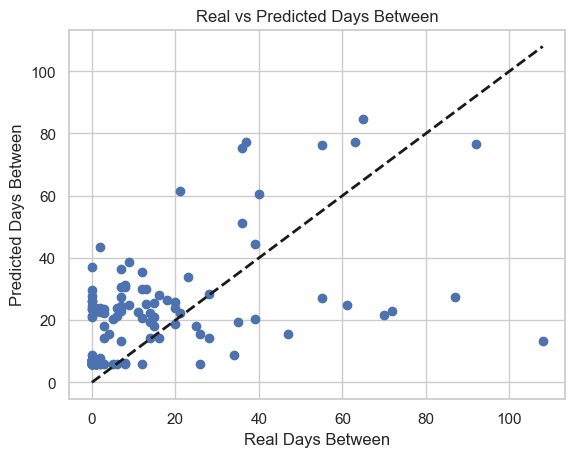

In [53]:
# Linear Regression Plot
plt.scatter(y_test, y_pred)
plt.xlabel('Real Days Between')
plt.ylabel('Predicted Days Between')
plt.title('Real vs Predicted Days Between')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  ## line
plt.show()

After running the first linear regression model, we obtained an R² of 0.13. 
This indicates that the model can explain 13% of the variability in the dependent variable 'days_between' using Quantity and Price as independent variables.

Additionally, according to the graph, there are many values that do not follow a linear relationship.

# **SPRING 3** <a class="anchor" id="spring3"></a>

# 5. Model Improvement <a class="anchor" id="model-imp"></a>

In this chapter we will keep trying to answer our question, using the previous model (Linear Regression), improving the model, applying a cross-validation for training the dataset and searching for more variables that can be representative for our model.

We will start generating a correlation graph between the independent variables 'Quantity', 'Price' and dependent variables 'days_between' to identify potential outliers that may be impacting our analysis.

## Improving Linear Regression <a class="anchor" id="lr-imp"></a>

## Removing Outliers <a class="anchor" id="lr-out"></a>

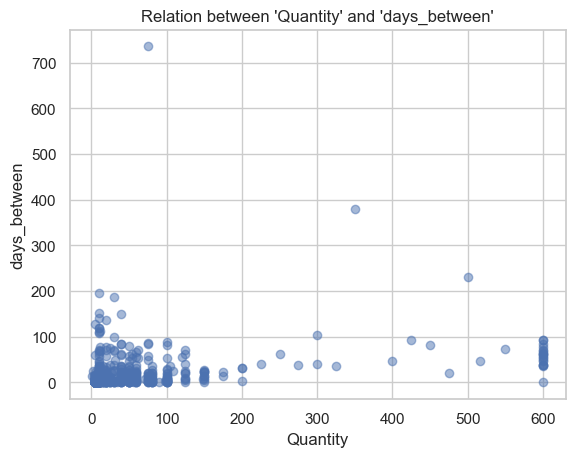

In [54]:
plt.scatter(df_filtered_regression[['Quantity']], y, alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('days_between')
plt.title("Relation between 'Quantity' and 'days_between'")
plt.show()

According to the scatter plot, there appears to be a non-linear relationship between the variables 'Quantity' and 'days_between', as the points do not follow a straight-line trend.

- The plot also shows that, when Quantity is low, the days between purchases (days_between) tend to be higher, and vice versa.

- There are many points with small Quantity values, which might be affecting the overall interpretation.

- Additionally, outliers can be observed with 'days_between' exceeding 700, 300, and 200 days.

For our analysis, we will set a threshold of 60 days maximum, as this represents a reasonable time between orders—approximately one order every two months.

In [55]:
# Checking the maximum values
print(df_filtered_regression['days_between'].describe())

count    721.000000
mean      15.217753
std       40.580558
min        0.000000
25%        0.000000
50%        1.000000
75%       14.000000
max      736.000000
Name: days_between, dtype: float64


According to the statistical summary, the average number of days between orders is 15 days, with a standard deviation of 40 days.

The maximum number of days observed between orders is 736 days.

The following graph shows the distribution of the values for the variable 'days_between'.

### Dependent variable analysis: 'Quantity'

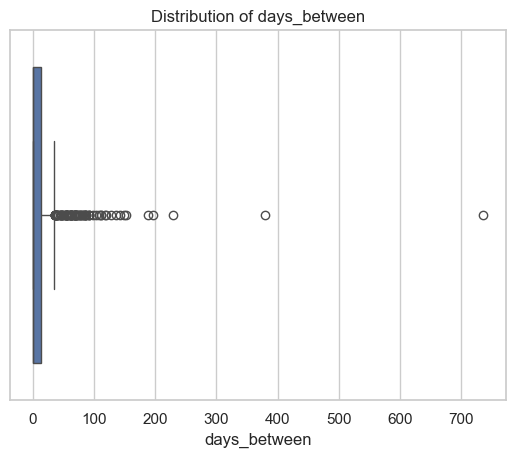

In [56]:
# Visualizing the distribution of 'days_between'
sns.boxplot(data=df_filtered_regression, x='days_between')
plt.title('Distribution of days_between')
plt.show()

### Independent variable analysis: 'Quantity'

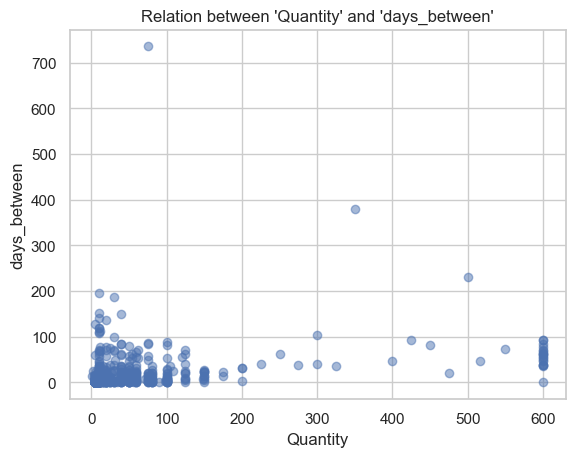

In [57]:
# Quantity Variable Analysis
plt.scatter(df_filtered_regression[['Quantity']], y, alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('days_between')
plt.title("Relation between 'Quantity' and 'days_between'")
plt.show()

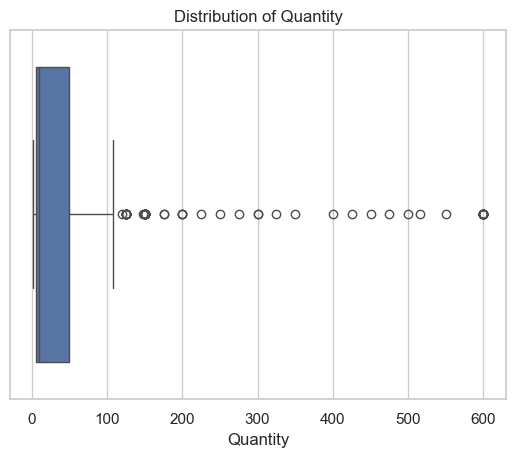

In [58]:
sns.boxplot(data=df_filtered_regression, x='Quantity')
plt.title('Distribution of Quantity')
plt.show()

In [59]:
# Checking the maximum values
print(df_filtered_regression['Quantity'].describe())

count    721.000000
mean      49.836338
std      109.654145
min        1.000000
25%        5.000000
50%       10.000000
75%       50.000000
max      600.000000
Name: Quantity, dtype: float64


Regarding the Quantity variable, it can be seen that 75% of the orders are approximately 50 cases. All values above 100 are outside the normal range.

However, for our analysis, we will not exclude these values, as an increase in the ordered quantities may be due to other factors, such as an increase in demand due to seasonality.

### Independent variable analysis: 'Price'

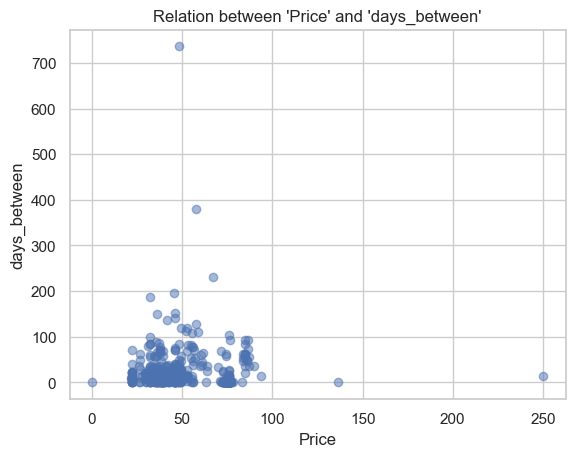

In [60]:
# Price Variable Analysis
plt.scatter(df_filtered_regression[['Price']], y, alpha=0.5)
plt.xlabel('Price')
plt.ylabel('days_between')
plt.title("Relation between 'Price' and 'days_between'")
plt.show()

In [61]:
# Checking the maximum values
print(df_filtered_regression['Price'].describe())

count    721.000000
mean      60.585746
std       20.593717
min        0.000000
25%       41.100000
50%       74.340000
75%       76.180000
max      250.000000
Name: Price, dtype: float64


Regarding the Price variable, it can be observed that the highest concentration of prices falls within the range of 41 to 76 dollars, with some values outside this range. 

Therefore, any records with prices greater than 100 dollars will be excluded.

## Next, we will set a threshold parameter as a filter for our DataFrame to exclude outliers from our model. After applying this filter, we will re-run the linear regression:

In [62]:
# Excluding records where 'days_between' values ​​greater than certain threshold
threshold_daysbetween = 60
#threshold_qty = 100
threshold_price = 100
df_filtered_regression = df_filtered_regression[(df_filtered_regression['days_between'] <= threshold_daysbetween) & (df_filtered_regression['Price'] <= threshold_price)]

count    664.000000
mean       7.435241
std       12.597805
min        0.000000
25%        0.000000
50%        1.000000
75%        9.000000
max       59.000000
Name: days_between, dtype: float64


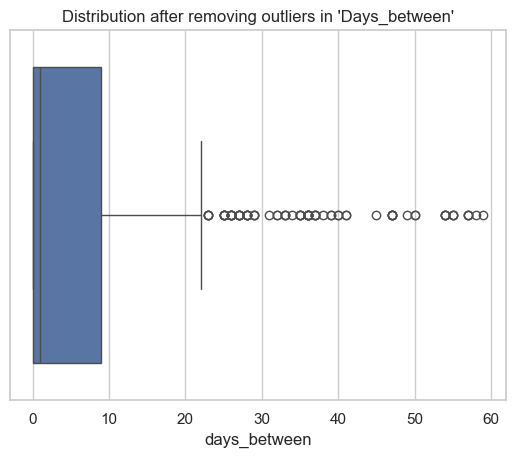

In [63]:
# Reviewing 'days_between' data again after applying the threshold:
print(df_filtered_regression['days_between'].describe())

# Visualizing the data again:
sns.boxplot(data=df_filtered_regression, x='days_between')
plt.title("Distribution after removing outliers in 'Days_between'")
plt.show()

count    664.000000
mean      60.834958
std       19.125052
min        0.000000
25%       41.540000
50%       74.340000
75%       76.180000
max       93.927000
Name: Price, dtype: float64


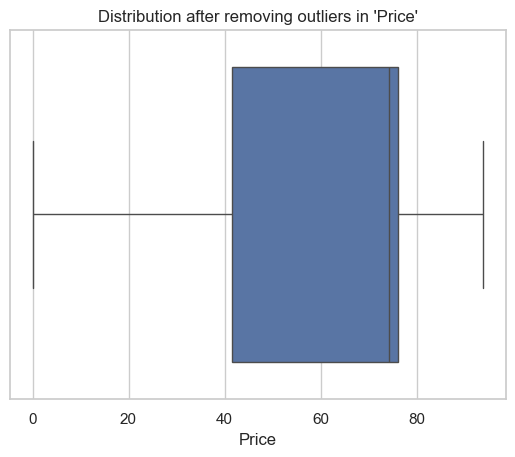

In [64]:
# Reviewing 'Price' data again after applying the threshold:
print(df_filtered_regression['Price'].describe())

# Visualizing the data again:
sns.boxplot(data=df_filtered_regression, x='Price')
plt.title("Distribution after removing outliers in 'Price'")
plt.show()

### Now that we have excluded outliers and only retained records where 'days_between' is less than 60, we will retrain our model:

## Linear Regression Improved <a class="anchor" id="lr-improved"></a>

In [65]:
# Defining x and y variables
X = df_filtered_regression[['Quantity','Price']]
y = df_filtered_regression['days_between']

In [66]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Model Predict
y_pred = model.predict(X_test)

In [67]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")

MSE: 81.99686162054144
R2: 0.43935584816754003


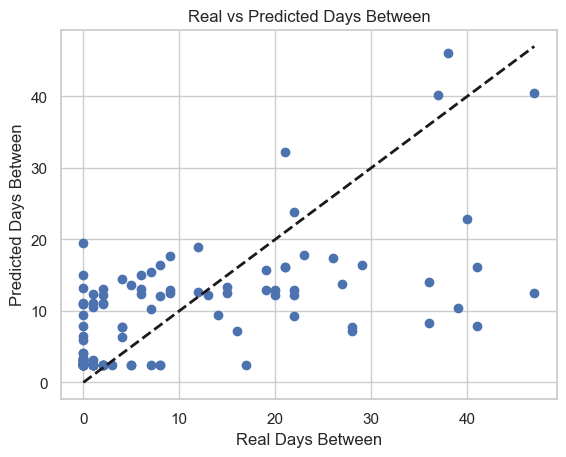

In [68]:
# Linear Regression Plot
plt.scatter(y_test, y_pred)
plt.xlabel('Real Days Between')
plt.ylabel('Predicted Days Between')
plt.title('Real vs Predicted Days Between')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  ## line
plt.show()

**R2 = 0.439:**

The model now explains 43.9% of the variability in the dependent variable y = days_between using the independent variables X = Quantity, Price. 
This means that almost 44% of the observed differences in days_between can be attributed to changes in Quantity and Price. 

While it is not a perfect fit, it represents a significant improvement and demonstrates that Quantity and Price are relevant variables for explaining days_between.

**MSE = 81.99:**

The Mean Squared Error (MSE) measures the average squared error between the actual values and the predictions. A lower MSE value indicates that the model's predictions are closer to the real values. 

Compared to the initial model where MSE were 350, this number has decreased, indicating better prediction accuracy.

## Time Features <a class="anchor" id="lr-timefeature"></a>

### Adding the date variable to the model will allow it to account for potential seasonality effects. By incorporating the date, the model can capture patterns or trends that occur at specific times of the year, which might influence the dependent variable days_between. 

### This addition could further improve the model's ability to explain variations in the data and provide more accurate predictions by reflecting time-based influences like seasonal demand changes.

In [69]:
# Make sure DocDate is of type datetime
df_filtered_regression['DocDate'] = pd.to_datetime(df_filtered_regression['DocDate'])

# Creating new variables from date
df_filtered_regression['Month'] = df_filtered_regression['DocDate'].dt.month
df_filtered_regression['DayOfWeek'] = df_filtered_regression['DocDate'].dt.dayofweek
df_filtered_regression['WeekOfYear'] = df_filtered_regression['DocDate'].dt.isocalendar().week
df_filtered_regression['Year'] = df_filtered_regression['DocDate'].dt.year
df_filtered_regression['DayOfYear'] = df_filtered_regression['DocDate'].dt.dayofyear

In [70]:
# Encoding categorical variables 'Month' and 'DayOfWeek'
df_encoded = pd.get_dummies(df_filtered_regression, columns=['Month', 'DayOfWeek'], drop_first=True)

In [71]:
# Independent variables  (X)
X = df_encoded[['Quantity', 'Price'] + 
               [col for col in df_encoded.columns if col.startswith('Month_') or col.startswith('DayOfWeek_')] +
               ['WeekOfYear', 'Year']]

# Dependent Variables  (y)
y = df_encoded['days_between']

In [72]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")

MSE: 86.64077340544056
R2: 0.407603633114747


### **Interpretation:**

𝑅² = 0.408: 
The model now explains 40.8% of the variability in the dependent variable (days_between) using the independent variables Quantity, Price, Month, DayOfWeek, etc. Although 𝑅² has slightly decreased compared to the previous model (with 𝑅² = 0.439), the difference is not significant. This suggests that the seasonal variables (month and day of the week) are not contributing as much to the model as expected. It may be that seasonal fluctuations do not have as strong an impact on days_between as initially thought.

MSE = 86.64: The Mean Squared Error (MSE) has slightly increased compared to the previous model (which had a lower MSE). This indicates that the addition of seasonal variables might be introducing some noise or that these variables are not as predictive as Quantity and Price.

In [73]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df)

        Feature  Coefficient
0      Quantity     0.063421
1         Price    -0.179730
2       Month_2    -4.793071
3       Month_3    -1.252934
4       Month_4    -4.772472
5       Month_5     2.026530
6       Month_6    -5.283539
7       Month_7    -6.552122
8       Month_8    -6.295675
9       Month_9    -8.869927
10     Month_10    -8.834892
11     Month_11    -7.342734
12     Month_12   -13.206722
13  DayOfWeek_1    -0.605826
14  DayOfWeek_2     0.616500
15  DayOfWeek_3    -2.149890
16  DayOfWeek_4    -2.369336
17  DayOfWeek_5    13.961926
18   WeekOfYear     0.152260
19         Year    -0.207354


### Some variables have very small coefficients, such as Quantity, Year, and WeekOfYear. Removing these variables to simplify the model

In [74]:
# Independent variables  (X)
X = df_encoded[['Price'] + 
               [col for col in df_encoded.columns if col.startswith('Month_') or col.startswith('DayOfWeek_')]]


# Dependent Variables  (y)
y = df_encoded['days_between']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")

MSE: 119.35255194457137
R2: 0.18394059319410816


## Final Linear Regression <a class="anchor" id="lr-final"></a>

After reducing the variables, we observe a decrease in the model's explanatory power compared to the previous one. Currently, the model shows an R² of 0.18, down from 0.40, and an increase in MSE from 86.84 to 119.35.

In summary, the second model, which only used the variables 'Price' and 'Quantity', is the one that best explains the variability in the dependent variable y = days_between, with an R² = 0.439.

We will proceed with this model.

### Setting our model with greater accuracy: R² = 43.9%.

In [75]:
# Defining x and y variables
X = df_filtered_regression[['Quantity','Price']]
y = df_filtered_regression['days_between']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Model Predict
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")

MSE: 81.99686162054144
R2: 0.43935584816754003


## Predicted Dates Using Linear Regression <a class="anchor" id="lr-predicting"></a>

### Applying the linear regression model to predict each customer's next purchases for their top product.

## Dates Between Purchase Predict Calculation for Customer C00086 - Dade Paper and Product 210X104WHBDC13.0M

We take the DataFrame containing only the client 'Dade Paper,' to which we will apply linear regression to predict the date of the next purchase, and we will compare it with the actual value of days between purchases (days_between).

We filter the DataFrame for the client 'Dade Paper' and their most purchased product: '210X104WHBDC13.0M'.

In [76]:
#columns = ['CardCode', 'CardName', 'ItemCode', 'ItemName','Quantity','Price','DocDate', 'days_between']

In [77]:
df_DadePaper = df_top_clients_items[(df_top_clients_items['CardCode']=='C00086') & (df_top_clients_items['ItemCode']=='210X104WHBDC13.0M')]

We group the quantities by day to have a record of the quantities purchased per day.

In [78]:
# Grouping quantities by day
df_DadePaper = df_DadePaper.groupby(['DocDate', 'ItemCode'], as_index=False).agg({
    'CardCode': 'first', 
    'CardName': 'first', 
    'ItemName': 'first', 
    'Quantity': 'sum', 
    'Price': 'first',
    'days_between': 'first'})

In [79]:
# Select the columns to be used as input for the model
X = df_DadePaper[['Quantity', 'Price']]

# Make the prediction using the model
df_DadePaper['Predicted_days_between'] = model.predict(X)

In [80]:
# Adding a column with the differences between 'days_between' and 'Predicted Days_between'
df_DadePaper['Diff Real vs Pred'] = df_DadePaper['days_between'] - df_DadePaper['Predicted_days_between']

For all predictions where the days exceed 5 days compared to the actual value, we define it as 'Bad', otherwise 'Good'.

In [81]:
# Adding a column with 'Good', 'Bad' where days greater that threshold
df_DadePaper['Evaluation'] = np.where(
    df_DadePaper['Diff Real vs Pred'].abs() <= 5, 
    'Good', 
    'Bad'  
)

Checking the values with the Actual and Predicted values

In [82]:
# Checking the values with the Actual and Predicted values 
df_DadePaper[['DocDate','CardName','days_between','Predicted_days_between', 'Diff Real vs Pred', 'Evaluation']].tail()

,DocDate,CardName,days_between,Predicted_days_between,Diff Real vs Pred,Evaluation
116,2024-08-15,Dade Paper,8.0,16.432739,-8.432739,Bad
117,2024-08-22,Dade Paper,7.0,10.275642,-3.275642,Good
118,2024-08-26,Dade Paper,4.0,7.766488,-3.766488,Good
119,2024-08-29,Dade Paper,3.0,13.526927,-10.526927,Bad
120,2024-09-13,Dade Paper,15.0,13.286530,1.713470,Good


Evaluating the number of predicted good and bad outcomes from the total data frame

In [83]:
# Counting 'Good' and 'Bad' results
counts = df_DadePaper['Evaluation'].value_counts()

# Calculate 'Good' and 'Bad' results as percentage
percentages = (counts / len(df_DadePaper)) * 100

# Showing the results
for category, count in counts.items():
    print(f"{category}: {count} rows ({percentages[category]:.2f}%)")

Bad: 77 rows (63.64%)
Good: 44 rows (36.36%)


### Now that we have applied the calculation and compared the actual values with those from our model, we will create a function that encapsulates the entire process and allows it to be applied to the rest of the clients.

In [84]:
# Creating function

def analyze_predictions(df, model, threshold=5):
    """
    Process a DataFrame to group data by date and item, make predictions,
    calculate differences, and evaluate results.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    model (object): A regression model with a .predict() method.
    threshold (int, optional): The maximum allowable difference for a 'Good' evaluation. Default is 5.

    Returns:
    pd.DataFrame: The processed DataFrame with additional columns for predictions and evaluation.
    dict: A dictionary with counts and percentages of 'Good' and 'Bad'.
    """
    # Grouping quantities by day
    grouped_df = df.groupby(['DocDate', 'ItemCode'], as_index=False).agg({
        'CardCode': 'first',
        'CardName': 'first',
        'ItemName': 'first',
        'Quantity': 'sum',
        'Price': 'first',
        'days_between': 'first'
    })

    # Select the columns to be used as input for the model
    X = grouped_df[['Quantity', 'Price']]

    # Make the prediction using the model
    grouped_df['Predicted_days_between'] = model.predict(X)

    # Adding a column with the differences between 'days_between' and 'Predicted Days_between'
    grouped_df['Diff Real vs Pred'] = grouped_df['days_between'] - grouped_df['Predicted_days_between']

    # Adding a column with 'Good', 'Bad' evaluations
    grouped_df['Evaluation'] = np.where(
        grouped_df['Diff Real vs Pred'].abs() <= threshold,
        'Good',
        'Bad'
    )

    # Counting 'Good' and 'Bad' results
    counts = grouped_df['Evaluation'].value_counts()

    # Calculate percentages
    percentages = (counts / len(grouped_df)) * 100

    # Preparing summary
    summary = {category: {'count': count, 'percentage': percentages[category]}
               for category, count in counts.items()}

    return grouped_df, summary

## Dates Between Purchase Predict Calculation for Customer C00421 - Bunzl R3 Philadelphia and Product 215X178WHBDC23.0M

In [85]:
# defining df just for this customer
df_Bunzl = df_top_clients_items[(df_top_clients_items['CardCode']=='C00421') & (df_top_clients_items['ItemCode']=='215X178WHBDC23.0M')]

In [86]:
# Calling the function with the DataFrame and the model
df_Bunzl_predict, df_Bunzl_predict_evaluation_summary = analyze_predictions(df_Bunzl, model)

In [87]:
# Showing the processed dataframe
df_Bunzl_predict.tail()

,DocDate,ItemCode,CardCode,CardName,ItemName,Quantity,Price,days_between,Predicted_days_between,Diff Real vs Pred,Evaluation
23,2024-01-31,215X178WHBDC23.0M,C00421,Bunzl R3 Philadelphia,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",600.0,84.557,62.0,40.658781,21.341219,Bad
24,2024-04-25,215X178WHBDC23.0M,C00421,Bunzl R3 Philadelphia,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",600.0,84.557,85.0,40.658781,44.341219,Bad
25,2024-05-31,215X178WHBDC23.0M,C00421,Bunzl R3 Philadelphia,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",600.0,89.987,36.0,39.643674,-3.643674,Good
26,2024-07-24,215X178WHBDC23.0M,C00421,Bunzl R3 Philadelphia,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",600.0,84.557,54.0,40.658781,13.341219,Bad
27,2024-08-30,215X178WHBDC23.0M,C00421,Bunzl R3 Philadelphia,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",600.0,84.557,37.0,40.658781,-3.658781,Good


In [88]:
# Model Evaluation
for category, stats in df_Bunzl_predict_evaluation_summary.items():
    print(f"{category}: {stats['count']} rows ({stats['percentage']:.2f}%)")

Bad: 25 rows (89.29%)
Good: 3 rows (10.71%)


## Dates Between Purchase Predict Calculation for Customer C00129 - General Hotel & Restaurant Supply Corp and Product 110X104WHBDC16.0M

In [89]:
# defining df just for this customer
df_GenHotel = df_top_clients_items[(df_top_clients_items['CardCode']=='C00129') & (df_top_clients_items['ItemCode']=='110X104WHBDC16.0M')]

In [90]:
# Calling the function with the DataFrame and the model
df_GenHotel_predict, df_GenHotel_predict_evaluation_summary = analyze_predictions(df_GenHotel, model)

In [91]:
# Showing the processed dataframe
df_GenHotel_predict.tail()

,DocDate,ItemCode,CardCode,CardName,ItemName,Quantity,Price,days_between,Predicted_days_between,Diff Real vs Pred,Evaluation
76,2024-06-12,110X104WHBDC16.0M,C00129,General Hotel & Restaurant Supply Corp,"Beverage Napkin: 1-Ply 10x10, 1/4 Fold. Regula...",50.0,48.31,14.0,10.605748,3.394252,Good
77,2024-07-22,110X104WHBDC16.0M,C00129,General Hotel & Restaurant Supply Corp,"Beverage Napkin: 1-Ply 10x10, 1/4 Fold. Regula...",225.0,45.83,40.0,22.787753,17.212247,Bad
78,2024-08-22,110X104WHBDC16.0M,C00129,General Hotel & Restaurant Supply Corp,"Beverage Napkin: 1-Ply 10x10, 1/4 Fold. Regula...",200.0,45.83,31.0,21.113698,9.886302,Bad
79,2024-09-11,110X104WHBDC16.0M,C00129,General Hotel & Restaurant Supply Corp,"Beverage Napkin: 1-Ply 10x10, 1/4 Fold. Regula...",75.0,48.31,20.0,12.279802,7.720198,Bad
80,2024-09-26,110X104WHBDC16.0M,C00129,General Hotel & Restaurant Supply Corp,"Beverage Napkin: 1-Ply 10x10, 1/4 Fold. Regula...",6.0,75.56,15.0,2.565178,12.434822,Bad


In [92]:
# Model Evaluation
counts = df_GenHotel_predict['Evaluation'].value_counts()
percentages = (counts / len(df_GenHotel_predict)) * 100

for category, count in counts.items():
    print(f"{category}: {count} rows ({percentages[category]:.2f}%)")

Bad: 62 rows (76.54%)
Good: 19 rows (23.46%)


## Dates Between Purchase Predict Calculation for Customer C00335 - US Foods and Product 210X104WHBDC13.0M

In [93]:
# defining df just for this customer
df_UsFood = df_top_clients_items[(df_top_clients_items['CardCode']=='C00335') & (df_top_clients_items['ItemCode']=='210X104WHBDC13.0M')]

In [94]:
# Calling the function with the DataFrame and the model
df_UsFood_predict, df_UsFood_predict_evaluation_summary = analyze_predictions(df_UsFood, model)

In [95]:
# Showing the processed dataframe
df_UsFood_predict.tail()

,DocDate,ItemCode,CardCode,CardName,ItemName,Quantity,Price,days_between,Predicted_days_between,Diff Real vs Pred,Evaluation
22,2024-01-04,210X104WHBDC13.0M,C00335,US Foods,"Beverage Napkin, 2 PLY, 10 X 10 White, 1/4 Fol...",12.0,56.100,77.0,6.604888,70.395112,Bad
23,2024-01-30,210X104WHBDC13.0M,C00335,US Foods,"Beverage Napkin, 2 PLY, 10 X 10 White, 1/4 Fol...",125.0,39.136,26.0,17.342939,8.657061,Bad
24,2024-03-29,210X104WHBDC13.0M,C00335,US Foods,"Beverage Napkin, 2 PLY, 10 X 10 White, 1/4 Fol...",5.0,74.310,59.0,2.731896,56.268104,Bad
25,2024-04-12,210X104WHBDC13.0M,C00335,US Foods,"Beverage Napkin, 2 PLY, 10 X 10 White, 1/4 Fol...",20.0,42.090,14.0,9.759676,4.240324,Good
26,2024-08-27,210X104WHBDC13.0M,C00335,US Foods,"Beverage Napkin, 2 PLY, 10 X 10 White, 1/4 Fol...",20.0,41.540,137.0,9.862495,127.137505,Bad


In [96]:
# Model Evaluation
counts = df_UsFood_predict['Evaluation'].value_counts()
percentages = (counts / len(df_UsFood_predict)) * 100

for category, count in counts.items():
    print(f"{category}: {count} rows ({percentages[category]:.2f}%)")

Bad: 25 rows (92.59%)
Good: 2 rows (7.41%)


## Dates Between Purchase Predict Calculation for Customer C00706 - Clark Associates, Inc. and Product CPCHCP161.0M-1

In [97]:
# defining df just for this customer
df_Clark = df_top_clients_items[(df_top_clients_items['CardCode']=='C00706') & (df_top_clients_items['ItemCode']=='CPCHCP161.0M-1')]

In [98]:
# Calling the function with the DataFrame and the model
df_Clark_predict, df_Clark_predict_evaluation_summary = analyze_predictions(df_Clark, model)

In [99]:
# Showing the processed dataframe
df_Clark_predict.tail()

,DocDate,ItemCode,CardCode,CardName,ItemName,Quantity,Price,days_between,Predicted_days_between,Diff Real vs Pred,Evaluation
98,2024-09-25,CPCHCP161.0M-1,C00706,"Clark Associates, Inc.","CUP, CHOICE, CLEAR PLASTIC, 16 OZ, CASE PACK 1...",22.0,76.18,2.0,3.520667,-1.520667,Good
99,2024-10-10,CPCHCP161.0M-1,C00706,"Clark Associates, Inc.","CUP, CHOICE, CLEAR PLASTIC, 16 OZ, CASE PACK 1...",15.0,76.18,15.0,3.051932,11.948068,Bad
100,2024-10-15,CPCHCP161.0M-1,C00706,"Clark Associates, Inc.","CUP, CHOICE, CLEAR PLASTIC, 16 OZ, CASE PACK 1...",15.0,76.18,5.0,3.051932,1.948068,Good
101,2024-10-16,CPCHCP161.0M-1,C00706,"Clark Associates, Inc.","CUP, CHOICE, CLEAR PLASTIC, 16 OZ, CASE PACK 1...",5.0,76.18,1.0,2.382310,-1.382310,Good
102,2024-10-18,CPCHCP161.0M-1,C00706,"Clark Associates, Inc.","CUP, CHOICE, CLEAR PLASTIC, 16 OZ, CASE PACK 1...",15.0,76.18,2.0,3.051932,-1.051932,Good


In [100]:
# Model Evaluation
counts = df_Clark_predict['Evaluation'].value_counts()
percentages = (counts / len(df_Clark_predict)) * 100

for category, count in counts.items():
    print(f"{category}: {count} rows ({percentages[category]:.2f}%)")

Good: 87 rows (84.47%)
Bad: 16 rows (15.53%)


## Consolidated Evaluation of Prediction Using Linear Regression <a class="anchor" id="lr-evaluation"></a>

The following table shows the evaluation of the model's execution applied to each client, along with their indicators for favorable and unfavorable results compared to the actual value.

In [151]:
EvaluationSummuary = {
    "Customer Id": ["C00086", "C00421", "C00129", "C00335", "C00706"],
    "Customer Name": ["Dade Paper", "Bunzl R3 Philadelphia", "General Hotel & Restaurant Supply Corp", 
                      "US Foods and Product", "Clark Associates, Inc."],
    "Item Id": ["210X104WHBDC13.0M", "215X178WHBDC23.0M", "110X104WHBDC16.0M", "210X104WHBDC13.0M", "CPCHCP161.0M-1"],
    "Total Records": [121, 28, 81, 27, 103],
    "Good_Predict": [44, 3, 19, 2, 87],
    "Bad_Predict": [77, 25, 62, 25, 16],
    "Good_Predict %": ["36.36%", "10.71%", "23.46%", "7.41%", "84.47%"],
    "Bad_Predict %": ["63.64%", "89.29%", "76.54%", "92.59%", "15.53%"]
}

df_EvaluationSummuary = pd.DataFrame(EvaluationSummuary)
df_EvaluationSummuary[['Customer Name', 'Total Records','Good_Predict','Bad_Predict','Good_Predict %','Bad_Predict %']]

,Customer Name,Total Records,Good_Predict,Bad_Predict,Good_Predict %,Bad_Predict %
0,Dade Paper,121,44,77,36.36%,63.64%
1,Bunzl R3 Philadelphia,28,3,25,10.71%,89.29%
2,General Hotel & Restaurant Supply Corp,81,19,62,23.46%,76.54%
3,US Foods and Product,27,2,25,7.41%,92.59%
4,"Clark Associates, Inc.",103,87,16,84.47%,15.53%


In [150]:
df_EvaluationSummuary

,Customer Id,Customer Name,Item Id,Total Records,Good_Predict,Bad_Predict,Good_Predict %,Bad_Predict %
0,C00086,Dade Paper,210X104WHBDC13.0M,121,44,77,36.36%,63.64%
1,C00421,Bunzl R3 Philadelphia,215X178WHBDC23.0M,28,3,25,10.71%,89.29%
2,C00129,General Hotel & Restaurant Supply Corp,110X104WHBDC16.0M,81,19,62,23.46%,76.54%
3,C00335,US Foods and Product,210X104WHBDC13.0M,27,2,25,7.41%,92.59%
4,C00706,"Clark Associates, Inc.",CPCHCP161.0M-1,103,87,16,84.47%,15.53%


## **Linear Regression Conclusion:** <a class="anchor" id="lr-finalconc"></a>

After making several adjustments to the linear regression model, including the addition of categorical variables such as month, year, and day of the week, It has been validated that Price and Quantity are the variables that best explain the variability of the dependent variable, 'days_between_purchases,' achieving a precision of 43%.

We applied the model to real-world data and predicted the next purchase date.

This prediction was compared to our initial approach, which used a simple average calculation to estimate the time between purchases.

The table above shows the estimated purchase time for each method and the difference between them.

For clients C00086 - Dade Paper and C00706 - Clark Associates, Inc., the estimated values exhibit minimal variation. However, in other cases, the differences are significant.

It's important to note that the simple average calculation includes all historical values, including outliers.
In contrast, the linear regression approach excluded outliers that affected the model, particularly in the 'predicted_days_between' and 'price' variables.

This provides a solid baseline for decision-making regarding the restocking process for each client based on their top product.

## 3. Time Series for Estimated Purchase Quantities <a class="anchor" id="ts-projected"></a>

We will proceed to apply a time series model to estimate the quantities to sell in the upcoming months. This approach addresses one of the key questions of the project: identifying the purchase quantities per customer.

This model will initially be applied exclusively to the customer Bunzl R3 Philadelphia.

Once evaluated and optimized, it can be replicated for the remaining customers.

In [102]:
# importing the neccesary libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import mstats

In [354]:
# Create a copy of the original DataFrame
df_Bunzl_timeseries = df_Bunzl.copy()

# Filtering records where dates less than September 2023, with the aim of predict until October 2024 and compare with real data
df_Bunzl_timeseries = df_Bunzl_timeseries[(df_Bunzl_timeseries['DocDate'] <= '2023-09-01')]

## Defining Dataframe for Time Series <a class="anchor" id="ts-data"></a>

In [355]:
# Using Only columns 'DocDate', 'Quantity'
df_Bunzl_timeseries = df_Bunzl_timeseries[['DocDate', 'Quantity']]

In [356]:
# The first thing is to convert the date as the index.
# We convert the 'DocDate' column to the index:
df_Bunzl_timeseries.set_index('DocDate', inplace=True)

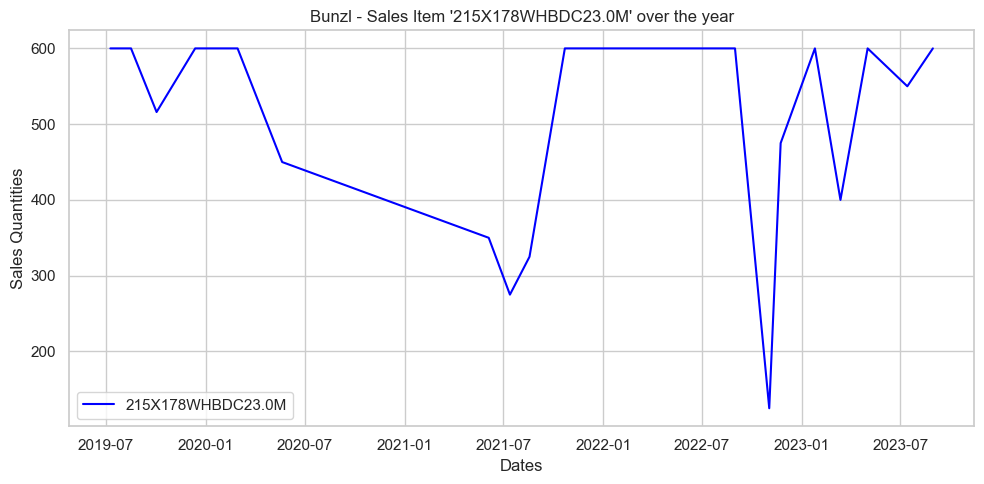

In [357]:
# Graphing the originalall time series
plt.figure(figsize=(10, 5))
plt.plot(df_Bunzl_timeseries.index, df_Bunzl_timeseries['Quantity'], label='215X178WHBDC23.0M', color='blue')
plt.title("Bunzl - Sales Item '215X178WHBDC23.0M' over the year")
plt.xlabel('Dates')
plt.ylabel('Sales Quantities')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Due to the fact that sales are affected by time and seasonal behaviors that repeat over time, we will decompose the data into its components: 
- trend
- seasonality
- noise.

## Time Series Decomposition <a class="anchor" id="ts-decomp"></a>

In [358]:
# Resample the data to have monthly values (filling in missing values with interpolation if necessary).
df_Bunzl_timeseries = df_Bunzl_timeseries.resample('M').sum()

In [359]:
# Perform the seasonal decomposition (additive) of the time series.
decomposition = seasonal_decompose(df_Bunzl_timeseries, model='additive')

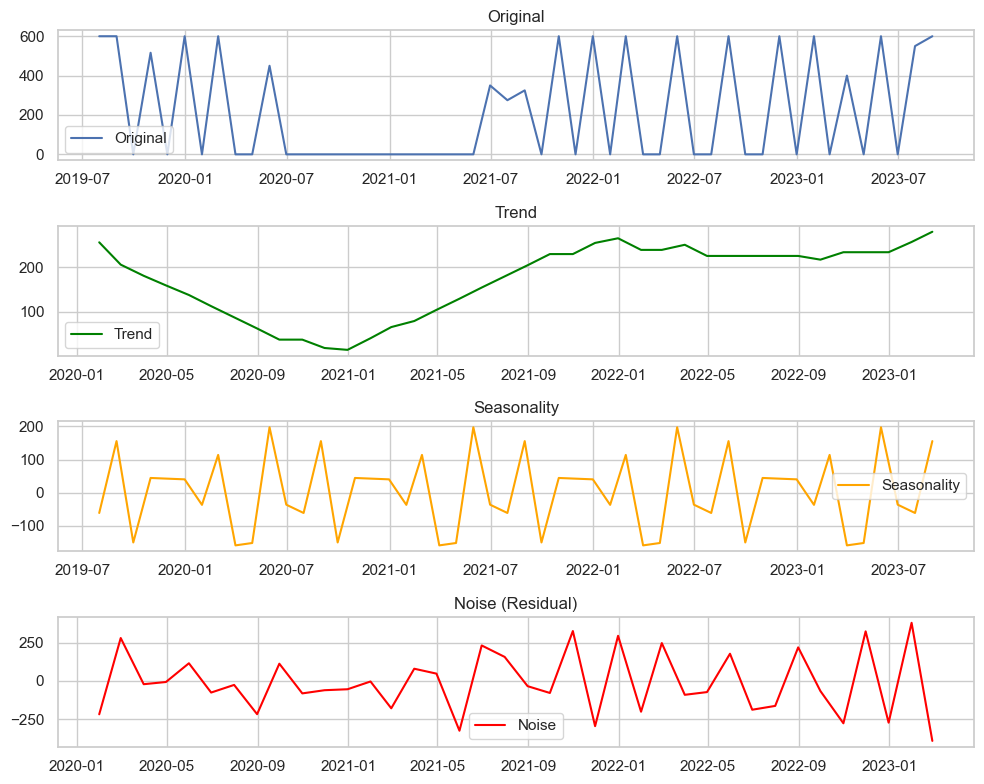

In [360]:
# Extract the components
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

#Plot the components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df_Bunzl_timeseries, label='Original')
plt.title('Original')
plt.legend()

plt.subplot(412)
plt.plot(trend, label='Trend', color='green')
plt.title('Trend')
plt.legend()

plt.subplot(413)
plt.plot(seasonality, label='Seasonality', color='orange')
plt.title('Seasonality')
plt.legend()

plt.subplot(414)
plt.plot(residual, label='Noise', color='red')
plt.title('Noise (Residual)')
plt.legend()

plt.tight_layout()
plt.show()

In the previous charts, we can observe the following information:

- Original: The original data presented in monthly values.
- Trend: The trend component, isolated from seasonality.
- Seasonality: This chart displays only the seasonal component. As we can see, there is significant variation in the temporal patterns.
- Residual: Also known as noise, this represents external factors that cannot be controlled and affect the data's evolution.

## Projection for the next 12 months <a class="anchor" id="ts-originalforecast"></a>

Next, we will perform the monthly sales forecast for the next 12 months:

In [361]:
# Project the trend for the next 12 months
# Take the last valid values of the trend (ignoring NaN) and create a model
valid_trend = trend.dropna()
future_months = 12
future_trend = np.polyval(np.polyfit(range(len(valid_trend)), valid_trend, 1), 
                              range(len(valid_trend), len(valid_trend) + future_months))

In [362]:
# Project the seasonality (assuming the pattern repeats)
future_seasonality = seasonality[-12:].values[:future_months]

In [363]:
# Create dates for the next 12 months
future_dates = pd.date_range(start=df_Bunzl_timeseries.index[-1] + pd.DateOffset(1), 
                               periods=future_months, freq='M')

In [364]:
# Add trend and seasonality to generate the projection
future_projection = future_trend + future_seasonality

In [365]:
# Create a DataFrame with the projections
projection_df = pd.DataFrame({
    'Date': future_dates,
    'Projection': future_projection
})

In [366]:
# Concatenate the original data with the projections
complete_projection = pd.concat([df_Bunzl_timeseries, projection_df.set_index('Date')])

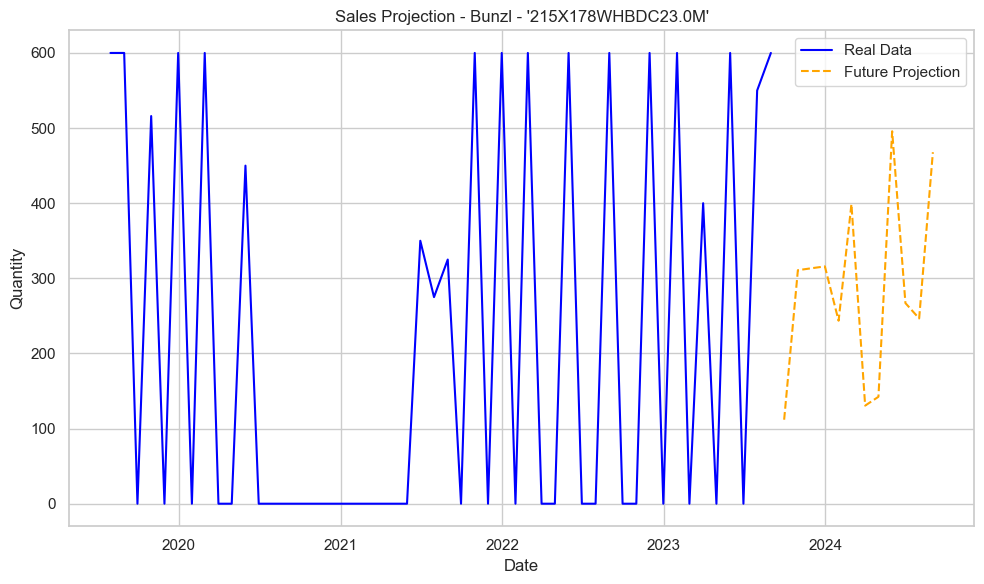

In [367]:
# Graph the result
plt.figure(figsize=(10, 6))

# Graph original serie
plt.plot(df_Bunzl_timeseries.index, df_Bunzl_timeseries['Quantity'], label='Real Data', color='blue')

# Graph the projections
plt.plot(future_dates, future_projection, label='Future Projection', color='orange', linestyle='--')

plt.title("Sales Projection - Bunzl - '215X178WHBDC23.0M'")
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This graph shows the historical data and the sales projection for the analyzed item '215X178WHBDC23.0M'.
The following table displays the projected values for each month that are expected to be purchased by the customer Bunzl.

In [370]:
complete_projection.tail(13)

,Quantity,Projection
2023-08-31,600.0,NaN
2023-09-30,NaN,111.814970
2023-10-31,NaN,310.849377
2023-11-30,NaN,313.356006
2023-12-31,NaN,315.862635
2024-01-31,NaN,243.556765
2024-02-29,NaN,398.667560
2024-03-31,NaN,130.576967
2024-04-30,NaN,142.333596
2024-05-31,NaN,495.756892


## Winsorization <a class="anchor" id="winsorization"></a>

### We will apply a filter to normalize the behavior so that extreme values are replaced with data within acceptable limits, addressing both unusually high sales and sharp declines.

### To achieve this, we will apply winsorization.

In [371]:
# Apply winsorization (10% limits)
# This trims extreme values outside the defined percentiles
winsorized_data = mstats.winsorize(df_Bunzl_timeseries['Quantity'], limits=(0.1, 0.1))

In [372]:
# Create a DataFrame with the original data and the data adjusted by Winsorization
df_winsorized = pd.DataFrame({
    'Date': df_Bunzl_timeseries.index,
    'Original': df_Bunzl_timeseries['Quantity'],
    'Winsorized': winsorized_data
}).set_index('Date')

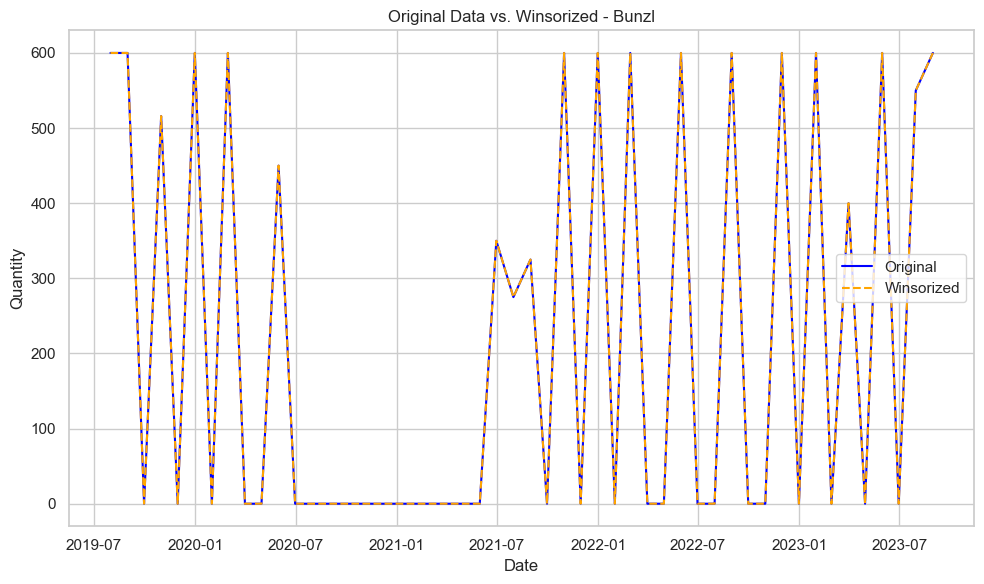

In [373]:
# Plot the original data vs. the data adjusted by Winsorization
plt.figure(figsize=(10, 6))

plt.plot(df_winsorized.index, df_winsorized['Original'], label='Original', color='blue')
plt.plot(df_winsorized.index, df_winsorized['Winsorized'], label='Winsorized', color='orange', linestyle='--')

plt.title('Original Data vs. Winsorized - Bunzl')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### In this case, there is no clear seasonality or trend that can be adjusted after applying winsorization, so graphically, no outliers are observed that have been limited.

We reapply the time series decomposition to evaluate each component separately.

## Winsorized Time Series Decomposition <a class="anchor" id="ts-decompwins"></a>

In [374]:
# Perform the seasonal decomposition (additive) of the time series.
decomposition_winsor = seasonal_decompose(df_winsorized['Winsorized'], model='additive')

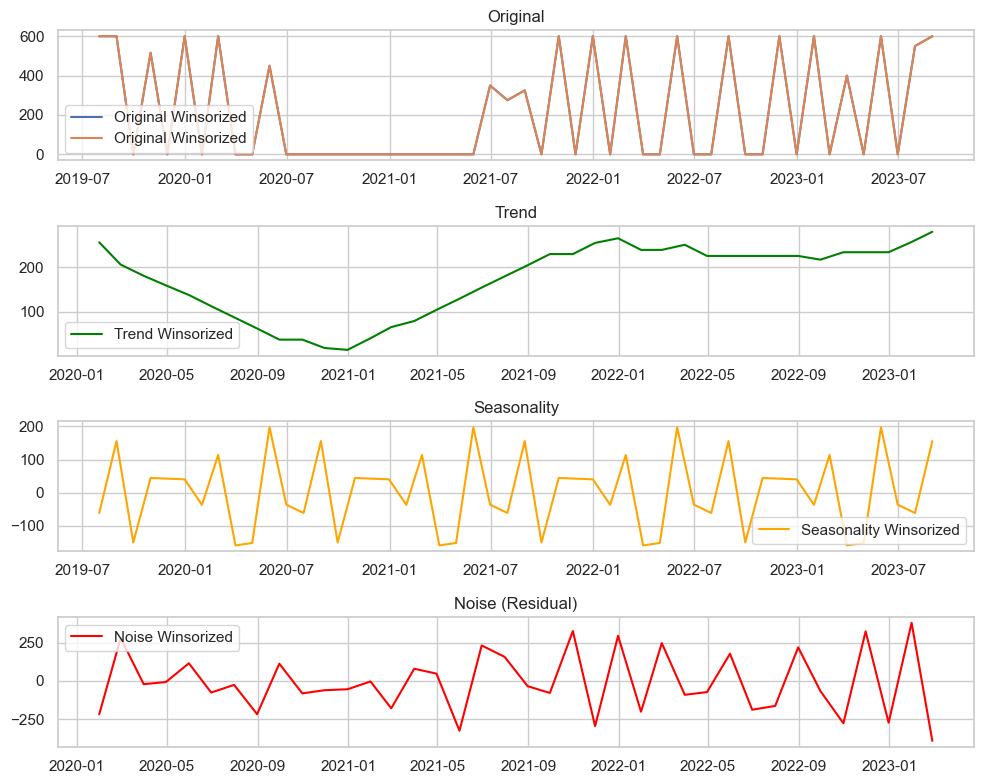

In [375]:
# Extract the components
trend_winsor = decomposition_winsor.trend
seasonality_winsor = decomposition_winsor.seasonal
residual_winsor = decomposition_winsor.resid

#Plot the components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df_winsorized, label='Original Winsorized')
plt.title('Original')
plt.legend()

plt.subplot(412)
plt.plot(trend_winsor, label='Trend Winsorized', color='green')
plt.title('Trend')
plt.legend()

plt.subplot(413)
plt.plot(seasonality_winsor, label='Seasonality Winsorized', color='orange')
plt.title('Seasonality')
plt.legend()

plt.subplot(414)
plt.plot(residual_winsor, label='Noise Winsorized', color='red')
plt.title('Noise (Residual)')
plt.legend()

plt.tight_layout()
plt.show()

As observed, there is no variation after applying the Winsorizer; the ranges in the trend, seasonality, and residuals remain the same as the original.

### Final Projeccion Winsorized <a class="anchor" id="ts-finalforecast"></a>

We will forecast the sales for the next 12 months using this new Winsorized data. Although there has been no variation compared to the initial data, we will use this as our final projection.

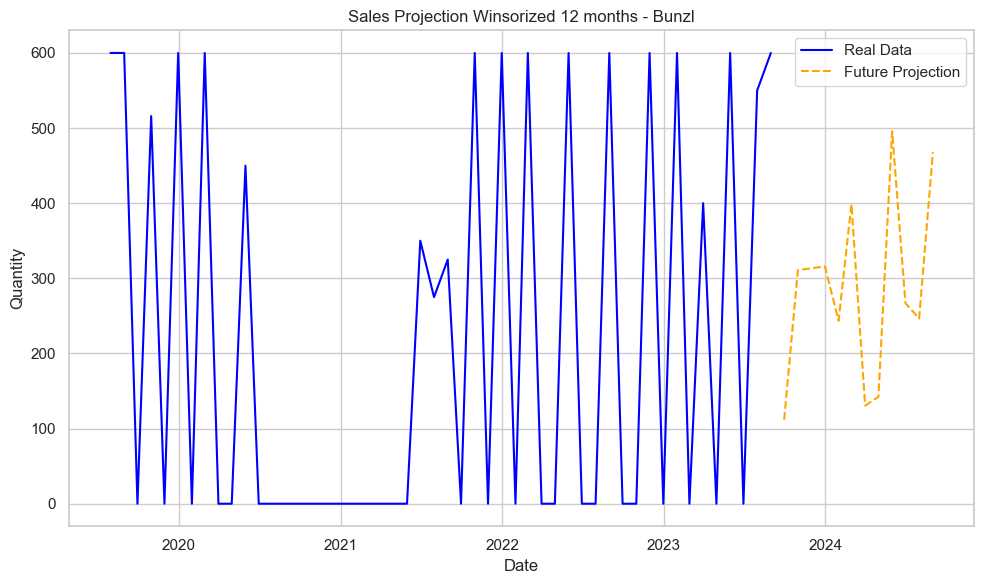

In [376]:
# Project the trend for the next 12 months
# Take the last valid values of the trend (ignoring NaN) and create a model
valid_trend = trend_winsor.dropna()
future_months = 12
future_trend = np.polyval(np.polyfit(range(len(valid_trend)), valid_trend, 1), 
                              range(len(valid_trend), len(valid_trend) + future_months))

# Project the seasonality (assuming the pattern repeats)
future_seasonality = seasonality_winsor[-12:].values[:future_months]

# Create dates for the next 12 months
future_dates = pd.date_range(start=df_Bunzl_timeseries.index[-1] + pd.DateOffset(1), 
                               periods=future_months, freq='M')

# Add trend and seasonality to generate the projection
future_projection = future_trend + future_seasonality

# Create a DataFrame with the projections
projection_df = pd.DataFrame({
    'Date': future_dates,
    'Projection': future_projection
})

# Concatenate the original data with the projections
complete_projection_winsor = pd.concat([df_winsorized[['Winsorized']], projection_df.set_index('Date')])

# Graph the result
plt.figure(figsize=(10, 6))

# Graph original serie winsorized
plt.plot(df_winsorized.index, df_winsorized['Winsorized'], label='Real Data', color='blue')

# Graph the projections
plt.plot(future_dates, future_projection, label='Future Projection', color='orange', linestyle='--')

plt.title('Sales Projection Winsorized 12 months - Bunzl')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [381]:
complete_projection_winsor = complete_projection_winsor[['Projection']].tail(12)
complete_projection_winsor

,Projection
Date,
2023-09-30,111.814970
2023-10-31,310.849377
2023-11-30,313.356006
2023-12-31,315.862635
2024-01-31,243.556765
2024-02-29,398.667560
2024-03-31,130.576967
2024-04-30,142.333596
2024-05-31,495.756892


### Time Series Conclusion <a class="anchor" id="ts-finalconcl"></a>

Based on this initial time series analysis, we have successfully identified the expected sales quantities for the client Bunzl R3 Philadelphia, for the product '215X178WHBDC23.0M'.

This provides a clearer view of the client's replenishment behavior, highlighting potential trends and seasonality patterns.

The model can be further enhanced by applying ARIMA and SARIMA, which would yield more accurate projections.

## Applying Average Method and Linear Regression for Predicted Dates and comparing with Real Values <a class="anchor" id="comp-methods"></a>

Now, a comparison will be made between the two methods, Simple Average and Linear Regression, to evaluate which one is closer to the actual date between each purchase.

This analysis will be conducted exclusively for the client Bunzl.

In [331]:
# Create a copy of the original DataFrame to avoid modifying the original data
filtered_df_Bunzl_time = df_Bunzl_predict.copy()

# Select only the relevant columns from the DataFrame
filtered_df_Bunzl_time = filtered_df_Bunzl_time[['DocDate', 'CardName', 'ItemName', 'days_between', 'Predicted_days_between']]

# Add a new column 'AVG_Predicted_Dates' with a constant value of 69 for all rows
filtered_df_Bunzl_time['AVG_Predicted_Dates'] = 69

# Calculate the difference between 'days_between' and 'AVG_Predicted_Dates', store it in 'AVG_Diff'
filtered_df_Bunzl_time['AVG_Diff'] = filtered_df_Bunzl_time['days_between'] - filtered_df_Bunzl_time['AVG_Predicted_Dates']

# Calculate the difference between 'days_between' and 'Predicted_days_between', store it in 'LinReg_Diff'
filtered_df_Bunzl_time['LinReg_Diff'] = filtered_df_Bunzl_time['days_between'] - filtered_df_Bunzl_time['Predicted_days_between']

# Rename the column 'days_between' to 'Real_Dates_Between' for clarity
filtered_df_Bunzl_time = filtered_df_Bunzl_time.rename(columns={'days_between': 'Real_Dates_Between'})

# Rename the column 'Predicted_days_between' to 'LinReg_Predicted_Dates' for clarity
filtered_df_Bunzl_time = filtered_df_Bunzl_time.rename(columns={'Predicted_days_between': 'LinReg_Predicted_Dates'})

# Create a new column 'Better_Method' to store which method is closer to zero ('AVG' or 'LinReg')
filtered_df_Bunzl_time['Better_Method'] = filtered_df_Bunzl_time.apply(
    lambda row: 'AVG' if abs(row['AVG_Diff']) < abs(row['LinReg_Diff']) else 'LinReg', axis=1
)

# Organizing the columns to have a better view
filtered_df_Bunzl = filtered_df_Bunzl[['DocDate','CardName','ItemName','Real_Dates_Between','AVG_Predicted_Dates','LinReg_Predicted_Dates','AVG_Diff','LinReg_Diff','Better_Method']]

In [332]:
filtered_df_Bunzl.tail(8)

,DocDate,CardName,ItemName,Real_Dates_Between,AVG_Predicted_Dates,LinReg_Predicted_Dates,AVG_Diff,LinReg_Diff,Better_Method
20,2023-08-30,Bunzl R3 Philadelphia,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",47.0,69,40.398368,-22.0,6.601632,LinReg
21,2023-10-24,Bunzl R3 Philadelphia,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",55.0,69,40.229183,-14.0,14.770817,AVG
22,2023-11-30,Bunzl R3 Philadelphia,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",37.0,69,40.205067,-32.0,-3.205067,LinReg
23,2024-01-31,Bunzl R3 Philadelphia,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",62.0,69,40.658781,-7.0,21.341219,AVG
24,2024-04-25,Bunzl R3 Philadelphia,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",85.0,69,40.658781,16.0,44.341219,AVG
25,2024-05-31,Bunzl R3 Philadelphia,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",36.0,69,39.643674,-33.0,-3.643674,LinReg
26,2024-07-24,Bunzl R3 Philadelphia,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",54.0,69,40.658781,-15.0,13.341219,LinReg
27,2024-08-30,Bunzl R3 Philadelphia,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",37.0,69,40.658781,-32.0,-3.658781,LinReg


### Performing a count of each method to evaluate which one is closer to the actual value of the variable 'Real_Dates_Between'

In [326]:
filtered_df_Bunzl['Better_Method'].value_counts()

Better_Method
AVG       15
LinReg    13
Name: count, dtype: int64

The linear method calculation shows an advantage over the linear regression method, as for 15 out of 28 records, the average calculation is closer to the actual value.

However, the difference is not very significant, as 13 records are more accurate with the linear regression method.

To evaluate globally and determine which method prevails, it would be necessary to apply the comparison to the rest of the clients.

## Comparing Time Series with real Values for 2024 <a class="anchor" id="ts-compar"></a>

We will now proceed to compare the variations between the values proposed by the time series and the actual values.

In [352]:
# Create a copy of the original DataFrame to avoid modifying the original data
filtered_df_Bunzl_qty = df_Bunzl_predict.copy()

# Select only the relevant columns from the DataFrame
filtered_df_Bunzl_qty = filtered_df_Bunzl_qty[['DocDate', 'Quantity']]

# Create columns for the year and month
filtered_df_Bunzl_qty['Year'] = filtered_df_Bunzl_qty['DocDate'].dt.year
filtered_df_Bunzl_qty['Month'] = filtered_df_Bunzl_qty['DocDate'].dt.month

# Create a complete range of years and months based on the existing data
all_years = range(filtered_df_Bunzl_qty['Year'].min(), filtered_df_Bunzl_qty['Year'].max() + 1)
all_months = range(1, 13)  # Months from 1 to 12

# Create a DataFrame with all possible combinations of years and months
all_combinations = pd.MultiIndex.from_product([all_years, all_months], names=['Year', 'Month']).to_frame(index=False)

# Group by year and month to sum the quantities
grouped_df = filtered_df_Bunzl_qty.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

# Merge the complete range of years and months with the grouped data
complete_df = pd.merge(all_combinations, grouped_df, on=['Year', 'Month'], how='left')

# Fill missing 'Quantity' values with 0
complete_df['Quantity'] = complete_df['Quantity'].fillna(0)

# Sort the data by year and month
complete_df = complete_df.sort_values(['Year', 'Month']).reset_index(drop=True)


In [383]:
# Real quantities Sold by Month
complete_df.tail(16)

,Year,Month,Quantity
56,2023,9,0.0
57,2023,10,600.0
58,2023,11,600.0
59,2023,12,0.0
60,2024,1,600.0
61,2024,2,0.0
62,2024,3,0.0
63,2024,4,600.0
64,2024,5,600.0
65,2024,6,0.0


In [384]:
# Projection based on Time Series
complete_projection_winsor

,Projection
Date,
2023-09-30,111.814970
2023-10-31,310.849377
2023-11-30,313.356006
2023-12-31,315.862635
2024-01-31,243.556765
2024-02-29,398.667560
2024-03-31,130.576967
2024-04-30,142.333596
2024-05-31,495.756892


As can be seen from the actual values, there is a purchasing pattern of approximately 600 units every two months from September 2023 to October 2024.

However, the time series does not capture this similar purchasing pattern, showing values spread across all months.

There is no need to calculate a delta between the actual and projected values, as it is clearly evident that the time series adjustments are necessary to align with the actual values.


# 6. Project Final Conclusion <a class="anchor" id="final-concl"></a>

In this work, we have explored sales data with the goal of answering the two primary original questions:

- Estimated date of the next purchase.
- Estimated purchase quantities.

After a data cleaning and normalization process, the following methods were evaluated and applied to project the required information:

**1. Simple Average Calculation:** Based on the historical sales data, we calculated the time in days between each purchase. From this, we determined the average number of days between each customer's purchases.

Similarly, for the quantities, we calculated the average purchase quantity based on the historical data.

**2. Linear Regression:** A linear regression model was trained, achieving 43% accuracy in predicting the estimated purchase time for each customer.

This model uses quantities and prices to predict the number of days until the next purchase.
The model can still be improved by identifying new variables that significantly influence each customer’s purchase time.
The main limitation of this model is its inability to capture seasonality, which impacts purchase timing and quantities.

**3. Time Series Analysis:** Finally, a time series model was applied to project the quantities to be sold each month for the year 2024.

Each of these models establishes a baseline for data-driven decision-making, enabling the company to better plan operations and proactively address the needs of its key clients.